# Contents

## 01 Set Up

## 02 Regional Segmentation - Flag Creation 

## 03 Determining spending tendencies by region

## 04 Exclusion of low-activity customers

## 05 Examining the profile of single customers for insights

## 06 Creating presentation versions of earlier graphics attempts

## 07 Merging information from the department dataset into the main dataset. 

## 08 Generating Visualizations for Department Level Examinations

## 09 Establishing a data frame from the orders_products_customers.pkl dataset. Starting work on a subsequent day.

## 10 Demographic Based Visualizations to Answer Questions for the Presentation

## 11 Saving the file and final verification

### 01 Set up - importing libraries, setting the path, creating the main dataframe

In [1]:
# Import Analysis Libraries
import pandas as pd
import numpy as np
import os

In [2]:
# Import Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import matplotlib.ticker as pl_ticker

In [4]:
# Defining the main project path
proj = r'C:\Users\bfd_6\Documents\Career Foundry Project\Course Part 2\A4 Python\Instacart Basket Analysis'

In [5]:
# Creating a dataframe from the main dataset
# NOTE: THIS WILL NOT BE USED LATER IN THE PROJECT. THIS STEP HAS BEEN RETAINED HERE FOR COMPLETENESS
ords_prods_all = pd.read_pickle(os.path.join(proj, '02 Data', 'Prepared Data', 'orders_products_customers.pkl'))

In [5]:
#Checking to see if the df is complete and correct.
ords_prods_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404859 entries, 0 to 32404858
Data columns (total 30 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int64   
 1   user_id                 int64   
 2   order_number            int64   
 3   orders_day_of_week      int64   
 4   order_hour_of_day       int64   
 5   days_since_prior_order  float64 
 6   product_id              int64   
 7   add_to_cart_order       int64   
 8   reordered               int64   
 9   product_name            object  
 10  aisle_id                int64   
 11  department_id           int64   
 12  prices                  float64 
 13  price_range_loc         object  
 14  busiest_days            object  
 15  busiest_period_of_day   object  
 16  max_order               int64   
 17  loyalty_flag            object  
 18  cust_avg_price          float64 
 19  price_spender           object  
 20  cust_med_days           float64 
 21  cust_f

In [6]:
ords_prods_all.describe().map(lambda x: f"{x:0.2f}")

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id,prices,max_order,cust_avg_price,cust_med_days,age,additional_family,income
count,32404859.00,32404859.00,32404859.00,32404859.00,32404859.00,30328763.00,32404859.00,32404859.00,32404859.00,32404859.00,32404859.00,32399732.00,32404859.00,32404859.00,32404854.00,32404859.00,32404859.00,32404859.00
mean,1710745.50,102937.23,17.14,2.74,13.43,11.10,25598.66,8.35,0.59,71.20,9.92,7.79,33.05,11.98,10.40,49.47,1.50,99437.73
std,987298.83,59466.10,17.54,2.09,4.25,8.78,14084.00,7.13,0.49,38.21,6.28,4.24,25.16,83.24,7.13,18.49,1.12,43057.27
min,2.00,1.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,0.00,18.00,0.00,25903.00
25%,855947.00,51422.00,5.00,1.00,10.00,5.00,13544.00,3.00,0.00,31.00,4.00,4.20,13.00,7.39,6.00,33.00,1.00,67004.00
50%,1711049.00,102616.00,11.00,3.00,13.00,8.00,25302.00,6.00,1.00,83.00,9.00,7.40,26.00,7.82,8.00,49.00,2.00,96618.00
75%,2565499.00,154389.00,24.00,5.00,16.00,15.00,37947.00,11.00,1.00,107.00,16.00,11.30,47.00,8.25,13.00,65.00,3.00,127912.00
max,3421083.00,206209.00,99.00,6.00,23.00,30.00,49688.00,145.00,1.00,134.00,21.00,25.00,99.00,25005.42,30.00,81.00,3.00,593901.00


### 02 Regional Segmentation - Creating a flag for US Region

In [7]:
# Double checking data validity for state column.
ords_prods_all['state'].value_counts()

state
Pennsylvania            667082
California              659783
Rhode Island            656913
Georgia                 656389
New Mexico              654494
Arizona                 653964
North Carolina          651900
Oklahoma                651739
Alaska                  648495
Minnesota               647825
Massachusetts           646358
Wyoming                 644255
Virginia                641421
Missouri                640732
Texas                   640394
Colorado                639280
Maine                   638583
North Dakota            638491
Alabama                 638003
Kansas                  637538
Louisiana               637482
Delaware                637024
South Carolina          636754
Oregon                  636425
Arkansas                636144
Nevada                  636139
New York                635983
Montana                 635265
South Dakota            633772
Illinois                633024
Hawaii                  632901
Washington              632852
Mi

In [8]:
# Creating lists for each region.
ne_list = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
mw_list = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']
sth_list = ['Delaware', 'Maryland', 'District of Columbia', 'Virgina', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennesseee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']
we_list = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [9]:
# Adding region flag based on state column
ords_prods_all.loc[ords_prods_all['state'].isin(ne_list), 'region'] = "Northeast" 

C:\Users\bfd_6\AppData\Local\Temp\ipykernel_1784\1662433787.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Northeast' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  ords_prods_all.loc[ords_prods_all['state'].isin(ne_list), 'region'] = "Northeast"


In [10]:
ords_prods_all.loc[ords_prods_all['state'].isin(mw_list), 'region'] = "Midwest" 

In [11]:
ords_prods_all.loc[ords_prods_all['state'].isin(sth_list), 'region'] = "South" 

In [12]:
ords_prods_all.loc[ords_prods_all['state'].isin(we_list), 'region'] = "West" 

In [5]:
# Verifying that the added flag worked and is correct.
ords_prods_all['region'].value_counts()

region
South        9532591
West         8292913
Midwest      7597325
Northeast    5722736
Name: count, dtype: int64

#### Using Crosstab for consistency check

In [9]:
pd.crosstab(ords_prods_all['department_id'], [ords_prods_all['loyalty_flag'], ords_prods_all['region']], values = ords_prods_all['prices'], aggfunc = 'sum', margins = True, margins_name = "Total").map(lambda x: f"{x:0.2f}")

loyalty_flag  Loyal customer                                         \
region               Midwest    Northeast        South         West   
department_id                                                         
1                 1078198.40    806738.80   1386211.40   1211682.30   
2                   17735.10     13694.70     21128.80     17212.60   
3                  682598.60    546534.80    867703.20    778553.20   
4                 5807625.70   4433874.40   7332210.70   6486458.90   
5                   75026.50     50704.70     95981.70     81479.30   
6                  134183.00    106342.30    176927.50    158359.10   
7                 1493062.80   1220193.50   1926238.70   1691955.10   
8                   45019.20     44503.10     55764.40     44125.00   
9                  418112.40    308691.60    517347.20    470805.80   
10                  28119.90     18271.70     32257.80     31913.00   
11                 233795.50    175692.20    293228.80    247171.70   
12                 761439.80    584895.80    967981.00    866333.20   
13                1056657.90    813127.20   1317743.70   1172545.90   
14                 404951.80    321960.50    519000.40    466929.40   
15                 512286.30    399106.70    663622.90    581901.50   
16                3511819.40   2758930.30   4475684.90   3956947.80   
17                 339376.00    264997.90    415787.20    368388.30   
18                 290227.60    225306.90    388057.70    308992.90   
19                 933754.20    724518.40   1173050.70   1045511.20   
20                 594307.70    455774.10    729268.20    661372.20   
21                  36418.10     29414.90     45128.60     40279.00   
Total            18454715.90  14303274.50  23400325.50  20688917.40   

loyalty_flag  New customer                                       \
region             Midwest   Northeast        South        West   
department_id                                                     
1                687565.60   513015.80    842607.60   743213.10   
2                 10012.80     8076.70     11921.60    10489.20   
3                317174.80   233862.00    394286.60   346807.00   
4               2513877.30  1880434.40   3154960.70  2740704.30   
5                 53447.50    43415.80     70871.50    57977.60   
6                 81958.30    58479.90     97807.20    85834.10   
7                719211.90   533508.30    886154.50   769233.20   
8                 28015.10    22488.20     35998.80    33923.50   
9                254175.50   185337.10    309942.90   278454.10   
10                 8683.70     5804.90     10406.80     8522.40   
11               145254.30   105311.00    177459.50   152366.90   
12               440643.50   316708.50    533086.00   467793.70   
13               566429.10   412299.20    703864.00   605926.30   
14               203646.70   148154.70    244986.00   221531.00   
15               319832.40   233804.90    393543.40   346680.30   
16              1479068.80  1076098.60   1822729.20  1611420.60   
17               228611.00   165265.80    279603.90   244584.30   
18                86306.50    60731.60    111245.30    90137.70   
19               415674.50   315876.70    512531.90   454116.90   
20               285924.90   217091.10    358601.10   311104.00   
21                26204.00    18537.10     32782.20    27759.00   
Total           8871718.20  6554302.30  10985390.70  9608579.20   

loyalty_flag  Regular customer                                         \
region                 Midwest    Northeast        South         West   
department_id                                                           
1                   2080893.80   1544914.40   2623700.30   2244519.30   
2                     29548.90     21185.80     36401.30     32856.00   
3                   1058491.20    787083.50   1310813.40   1138335.90   
4                   8712606.80   6394010.30  10850807.70   9319028.70   
5                    148374.10    107

### 03 Determining spending tendencies by region

In [20]:
# Creating a flag for region crossed with price_spender
ords_prods_all.loc[(ords_prods_all['region'] == 'Northeast') & (ords_prods_all['price_spender'] == 'High spender'), 'regional_spender'] = "Northeast High Spender" 

In [21]:
ords_prods_all.loc[(ords_prods_all['region'] == 'Northeast') & (ords_prods_all['price_spender'] == 'Low spender'), 'regional_spender'] = "Northeast Low Spender" 

In [22]:
ords_prods_all.loc[(ords_prods_all['region'] == 'Midwest') & (ords_prods_all['price_spender'] == 'High spender'), 'regional_spender'] = "Midwest High Spender" 

In [23]:
ords_prods_all.loc[(ords_prods_all['region'] == 'Midwest') & (ords_prods_all['price_spender'] == 'Low spender'), 'regional_spender'] = "Midwest Low Spender" 

In [24]:
ords_prods_all.loc[(ords_prods_all['region'] == 'West') & (ords_prods_all['price_spender'] == 'High spender'), 'regional_spender'] = "West High Spender" 

In [25]:
ords_prods_all.loc[(ords_prods_all['region'] == 'West') & (ords_prods_all['price_spender'] == 'Low spender'), 'regional_spender'] = "West Low Spender" 

In [26]:
ords_prods_all.loc[(ords_prods_all['region'] == 'South') & (ords_prods_all['price_spender'] == 'High spender'), 'regional_spender'] = "South High Spender" 

In [27]:
ords_prods_all.loc[(ords_prods_all['region'] == 'South') & (ords_prods_all['price_spender'] == 'Low spender'), 'regional_spender'] = "South Low Spender" 

In [28]:
# Verifying that the new flag worked.
ords_prods_all['regional_spender'].value_counts()

regional_spender
South Low Spender         9349973
West Low Spender          8132559
Midwest Low Spender       7441350
Northeast Low Spender     5614511
South High Spender         182618
West High Spender          160354
Midwest High Spender       155975
Northeast High Spender     108225
Name: count, dtype: int64

##### Based on the data above, I chose not to make stacked bars. I wanted to emphasize the difference between high and low spenders.

C:\Users\bfd_6\AppData\Local\Temp\ipykernel_23152\2924574043.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in cur_tix])


Text(0, 0.5, 'Total Orders')

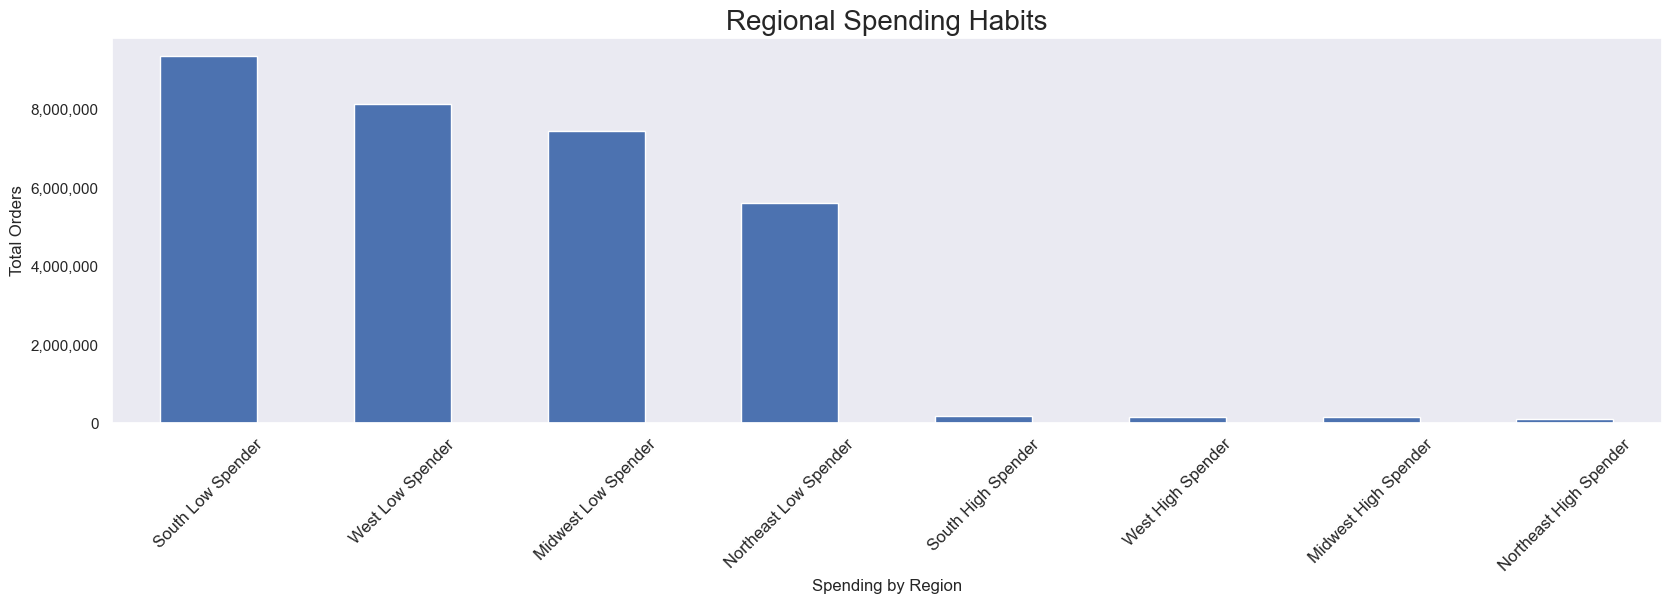

In [32]:
# Creating a bar chart based on the regional_spender column
fig = plt.subplots(figsize = (20, 5))
sns.set_theme(style = "dark")
pl_form = pl_ticker.ScalarFormatter()
reg_spend_bar = ords_prods_all['regional_spender'].value_counts().plot.bar()
plt.xticks(rotation = 45, fontsize = '12')
#plt.ylim(5000000, 16000000)
plt.gca().ticklabel_format(axis = 'y', style = 'plain')
cur_tix = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in cur_tix])
reg_spend_bar.set_title("Regional Spending Habits", fontsize = 20)
reg_spend_bar.set_xlabel("Spending by Region", fontsize = 12)
reg_spend_bar.set_ylabel("Total Orders", fontsize = 12)

In [19]:
ords_prods_all['price_spender'].value_counts()

price_spender
Low spender     31770614
High spender      634245
Name: count, dtype: int64

##### There does not appear to be any significant difference in overall spending habits based on region. 

In [33]:
# Saving bar chart for Regional Spending Habits
reg_spend_bar.figure.savefig(os.path.join(proj, '04 Analysis', 'Visualizations', 'Regional_Spender_Bar.png'))

### 04  Exclusion of low-activity customers

In [39]:
# Creating a new dataframe that excludes the low-activity customers
# NB -- I am backing up the orders_products_customers.pkl file as orders_customers_products_first.pkl
ords_prods_all_new = ords_prods_all.loc[(ords_prods_all['max_order'] >= 5)]

In [40]:
#Checking to make sure the changes worked. 
ords_prods_all_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30964564 entries, 0 to 32404854
Data columns (total 32 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int64   
 1   customer_id             object  
 2   order_number            int64   
 3   orders_day_of_week      int64   
 4   order_hour_of_day       int64   
 5   days_since_prior_order  float64 
 6   product_id              int64   
 7   add_to_cart_order       int64   
 8   reordered               int64   
 9   product_name            object  
 10  aisle_id                int64   
 11  department_id           int64   
 12  prices                  float64 
 13  price_range_loc         object  
 14  busiest_days            object  
 15  busiest_period_of_day   object  
 16  max_order               int64   
 17  loyalty_flag            object  
 18  cust_avg_price          float64 
 19  price_spender           object  
 20  cust_med_days           float64 
 21  cust_freque

In [41]:
# Statistical analysis of the new data frame.
ords_prods_all_new.describe().map(lambda x: f"{x:0.2f}")

,order_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id,prices,max_order,cust_avg_price,cust_med_days,age,additional_family,income
count,30964564.00,30964564.00,30964564.00,30964564.00,29303281.00,30964564.00,30964564.00,30964564.00,30964564.00,30964564.00,30959687.00,30964564.00,30964564.00,30964564.00,30964564.00,30964564.00,30964564.00
mean,1710317.50,17.83,2.74,13.41,10.81,25598.50,8.36,0.61,71.19,9.92,7.79,34.43,11.93,9.96,49.47,1.50,99675.87
std,987378.52,17.63,2.09,4.25,8.58,14080.96,7.14,0.49,38.22,6.28,4.24,24.90,79.92,6.67,18.49,1.12,43141.87
min,2.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00,5.00,1.00,0.00,18.00,0.00,25903.00
25%,855412.00,5.00,1.00,10.00,5.00,13544.00,3.00,0.00,31.00,4.00,4.20,14.00,7.39,6.00,33.00,1.00,67292.00
50%,1710404.50,12.00,3.00,13.00,7.00,25288.00,6.00,1.00,83.00,9.00,7.40,28.00,7.83,7.00,49.00,2.00,96765.00
75%,2565206.00,25.00,5.00,16.00,14.00,37947.00,11.00,1.00,107.00,16.00,11.30,48.00,8.25,12.50,65.00,3.00,128102.00
max,3421083.00,99.00,6.00,23.00,30.00,49688.00,145.00,1.00,134.00,21.00,25.00,99.00,15006.94,30.00,81.00,3.00,593901.00


In [42]:
# Checking the impact of excluding this data.
ords_prods_all_new.shape

(30964564, 32)

In [43]:
ords_prods_all_new['regional_spender'].value_counts()

regional_spender
South Low Spender         8934441
West Low Spender          7774939
Midwest Low Spender       7112835
Northeast Low Spender     5361565
South High Spender         173815
West High Spender          152288
Midwest High Spender       148678
Northeast High Spender     103120
Name: count, dtype: int64

##### The new dataset contains 1,440,295 fewer rows, which represents 4.4% of the original dataset. It appears that the reduction covers all spending habits and regions. 

In [86]:
# Saving the new dataset as orders_products_customers.pkl - the previous iteration of this file has been backed up. 
ords_prods_all_new.to_pickle(os.path.join(proj, '02 Data', 'Prepared Data', 'orders_products_customers.pkl'))

### 05 Examining the profile of single customers for insights

In [46]:
ords_prods_all_new['marital_status'].value_counts()

marital_status
married                             21743711
single                               5094410
divorced/widowed                     2645271
living with parents and siblings     1481172
Name: count, dtype: int64

C:\Users\bfd_6\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bfd_6\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bfd_6\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bfd_6\AppData\Local\Temp\ipykernel_47120\760138309.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['${:,.0f}'.format(x) for x in cur_tix])


Text(0, 0.5, 'Income')

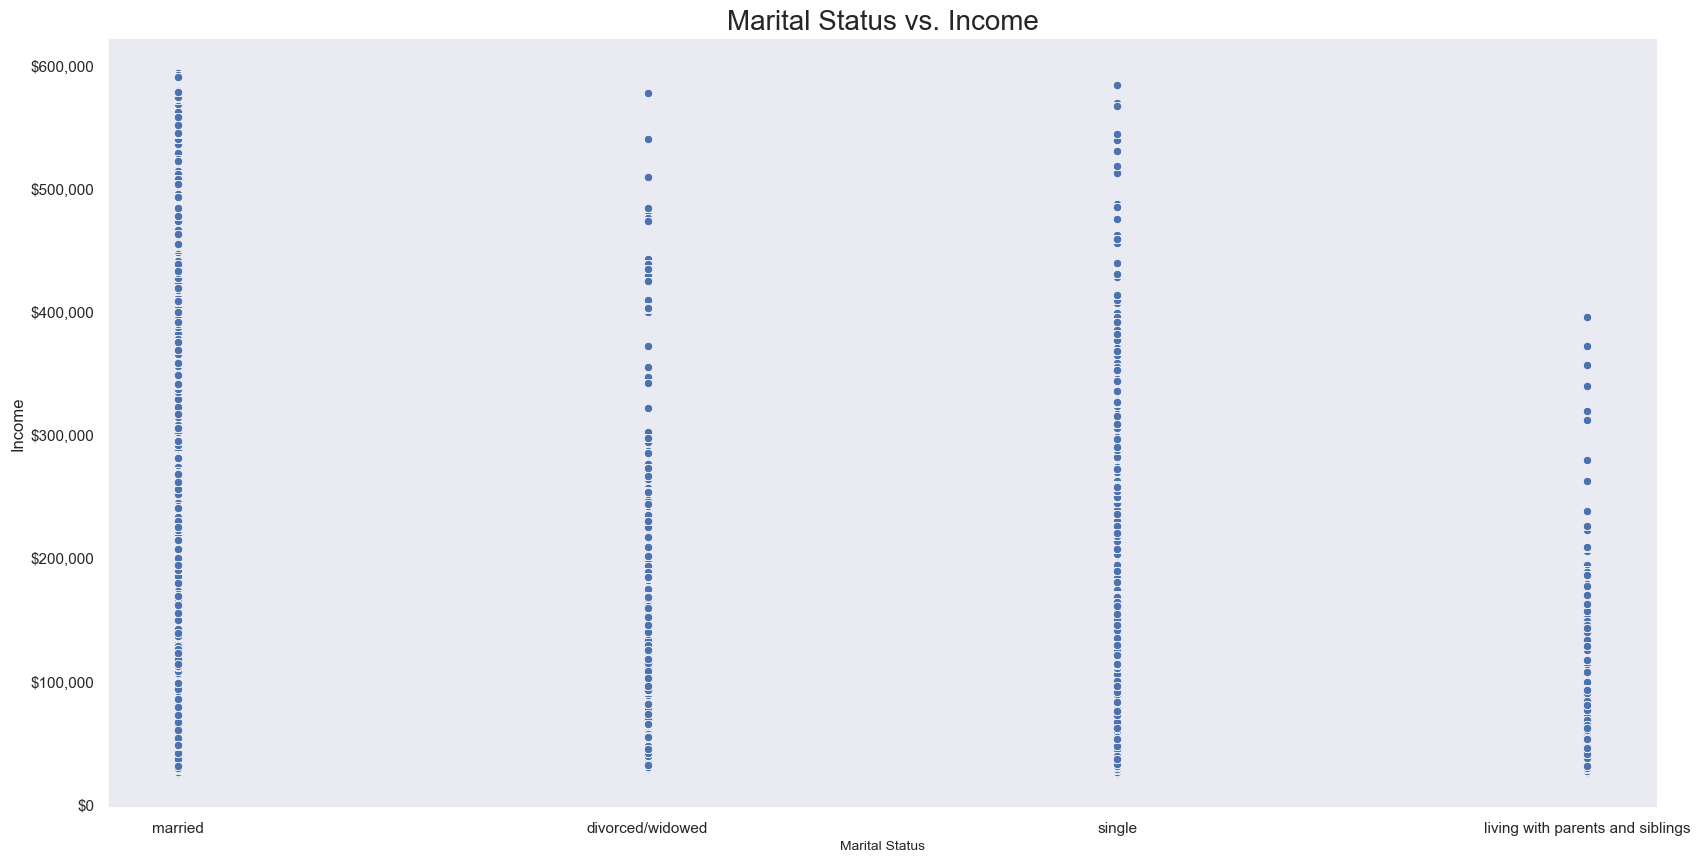

In [44]:
# Creating the scatter plot for marital_status vs. income
fig = plt.subplots(figsize = (20, 10))
sns.set_theme(style = "dark")
income_m_stat_scatter = sns.scatterplot(x = 'marital_status', y = 'income', data = ords_prods_all_new)
plt.gca().ticklabel_format(axis = 'y', style = 'plain')
cur_tix = plt.gca().get_yticks()
plt.gca().set_yticklabels(['${:,.0f}'.format(x) for x in cur_tix])
income_m_stat_scatter.set_title("Marital Status vs. Income", fontsize = 20)
income_m_stat_scatter.set_xlabel("Marital Status", fontsize = 10)
income_m_stat_scatter.set_ylabel("Income", fontsize = 12)

In [45]:
# Saving scatter chart for Marital Status vs. Income
income_m_stat_scatter.figure.savefig(os.path.join(proj, '04 Analysis', 'Visualizations', 'income_mar_stat_scatter.png'))

In [51]:
# Creating a subset for single customers to explore a potential profile
opan_single = ords_prods_all_new.loc[ords_prods_all_new['marital_status'] == 'single']

In [52]:
# Verifying subset
opan_single['marital_status'].value_counts()

marital_status
single    5094410
Name: count, dtype: int64

In [54]:
# Verifying subset
opan_single.shape

(5094410, 32)

In [56]:
# Examining department values in the subset
opan_single['department_id'].value_counts()

department_id
4     1498347
16     851774
19     454194
7      424462
1      345391
13     292013
3      185660
15     166752
20     166633
9      134045
17     112912
14     109842
12     108257
11      69892
18      68977
6       42647
5       24968
8       15577
21      10871
2        5872
10       5324
Name: count, dtype: int64

In [57]:
# Examining the statistics of the numeric fields in the subset without scientific notation.
opan_single.describe().map(lambda x: f"{x:0.2f}")

,order_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id,prices,max_order,cust_avg_price,cust_med_days,age,additional_family,income
count,5094410.00,5094410.00,5094410.00,5094410.00,4820773.00,5094410.00,5094410.00,5094410.00,5094410.00,5094410.00,5093677.00,5094410.00,5094410.00,5094410.00,5094410.00,5094410.00,5094410.00
mean,1711927.58,17.94,2.73,13.42,10.81,25585.17,8.32,0.61,71.15,9.92,7.78,34.66,12.40,9.97,38.60,0.00,91550.92
std,986460.44,17.80,2.09,4.26,8.57,14087.69,7.07,0.49,38.24,6.28,4.23,25.17,109.19,6.66,12.13,0.00,42234.16
min,8.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00,5.00,1.00,0.00,18.00,0.00,25903.00
25%,861075.00,5.00,1.00,10.00,5.00,13535.00,3.00,0.00,31.00,4.00,4.20,14.00,7.39,6.00,28.00,0.00,62006.00
50%,1710993.50,12.00,3.00,13.00,7.00,25256.00,6.00,1.00,83.00,9.00,7.40,28.00,7.82,7.00,39.00,0.00,85560.00
75%,2565752.00,25.00,5.00,16.00,14.00,37947.00,11.00,1.00,107.00,16.00,11.20,49.00,8.23,13.00,49.00,0.00,113676.00
max,3421077.00,99.00,6.00,23.00,30.00,49688.00,109.00,1.00,134.00,21.00,25.00,99.00,15006.94,30.00,59.00,0.00,584097.00


##### I found a better, cleaner way to create the dataframe for single customers after I did it this way.

In [63]:
# Creating an additional data frame to expand customer profile to include divorced/widowed customers
opan_single2 = ords_prods_all_new.loc[ords_prods_all_new['marital_status'] == 'divorced/widowed']

In [64]:
# Verifying the new subset
opan_single2.shape

(2645271, 32)

In [65]:
# Examining additional family in the new subset
opan_single2['additional_family'].value_counts()

additional_family
0    2645271
Name: count, dtype: int64

In [67]:
# Creating a list that contains both subset dataframes so I can concatenate into a single subset dataframe
opan_single_all_list = [opan_single, opan_single2] 

In [70]:
type(opan_single_all_list)

list

In [71]:
# Concatenating the lists into a single dataframe
opan_single_all = pd.concat(opan_single_all_list)

##### Adding a flag to test for a profile based on age.

In [83]:
# Creating a flag for age groups
opan_single_all.loc[opan_single_all['age'] < 40, 'age_group'] = "Under 40" 

C:\Users\bfd_6\AppData\Local\Temp\ipykernel_47120\445023223.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Under 40' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  opan_single_all.loc[opan_single_all['age'] < 40, 'age_group'] = "Under 40"


In [84]:
opan_single_all.loc[opan_single_all['age'] >= 40, 'age_group'] = "40 plus"

In [78]:
# Verifying the new flag
opan_single_all['age_group'].value_counts()

age_group
40 plus     5079106
Under 40    2660575
Name: count, dtype: int64

In [85]:
# Saving the profile dataset
opan_single_all.to_pickle(os.path.join(proj, '02 Data', 'Prepared Data', 'opan_single_all.pkl'))

C:\Users\bfd_6\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bfd_6\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bfd_6\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bfd_6\AppData\Local\Temp\ipykernel_23520\760024505.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in cur_tix])


(15.0, 85.0)

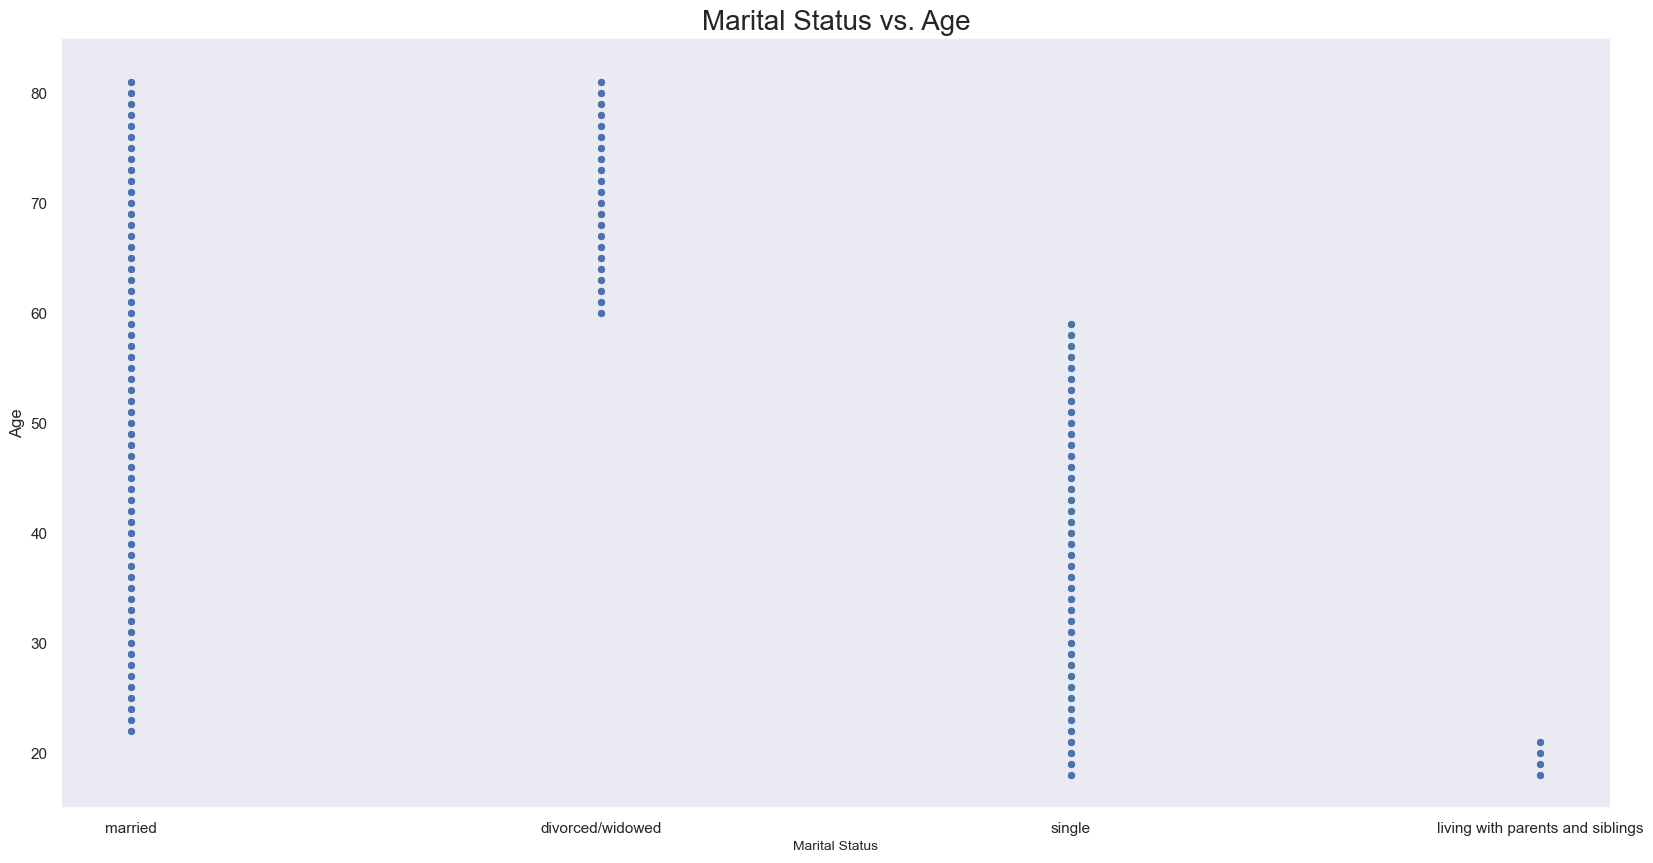

In [66]:
# Creating the scatter plot for marital_status vs. age
fig = plt.subplots(figsize = (20, 10))
sns.set_theme(style = "dark")
age_m_stat_scatter = sns.scatterplot(x = 'marital_status', y = 'age', data = ords_prods_all_new)
plt.gca().ticklabel_format(axis = 'y', style = 'plain')
cur_tix = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in cur_tix])
age_m_stat_scatter.set_title("Marital Status vs. Age", fontsize = 20)
age_m_stat_scatter.set_xlabel("Marital Status", fontsize = 10)
age_m_stat_scatter.set_ylabel("Age", fontsize = 12)
plt.ylim(15, 85)

In [67]:
# Saving scatter chart for Marital Status vs. Age
age_m_stat_scatter.figure.savefig(os.path.join(proj, '04 Analysis', 'Visualizations', 'age_mar_stat_scatter.png'))

##### The following is the cleaner way to create the dataframe for single customers. I could have included the living at home group, but it was de minimis.

In [6]:
# Re_creating opan_single_all using OR operator | 
opan_single_all = ords_prods_all.loc[(ords_prods_all['marital_status'] == 'single') | (ords_prods_all['marital_status'] == 'divorced/widowed')]

In [16]:
opan_single_all.shape

(7739681, 32)

In [17]:
opan_single_all['marital_status'].value_counts()

marital_status
single              5094410
divorced/widowed    2645271
Name: count, dtype: int64

##### The age_group flag is sufficiently helpful. I'm adding it to the main dataset so it will be retained going forward.

In [13]:
# Applying the age_group flag to the main dataset. It is a viable and pertinent flag.
ords_prods_all_new.loc[ords_prods_all_new['age'] < 40, 'age_group'] = "Under 40" 

C:\Users\bfd_6\AppData\Local\Temp\ipykernel_28740\2579587998.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Under 40' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  ords_prods_all_new.loc[ords_prods_all_new['age'] < 40, 'age_group'] = "Under 40"


In [14]:
ords_prods_all_new.loc[ords_prods_all_new['age'] >= 40, 'age_group'] = "40 plus"

In [15]:
# Verifying the new flag
ords_prods_all_new['age_group'].value_counts()

age_group
40 plus     20299454
Under 40    10665110
Name: count, dtype: int64

##### Examining whether regional spending differs for single customers. 

C:\Users\bfd_6\AppData\Local\Temp\ipykernel_47120\1500498473.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['${:,.0f}'.format(x) for x in cur_tix])


Text(0, 0.5, 'Total Revenue (US Dollars)')

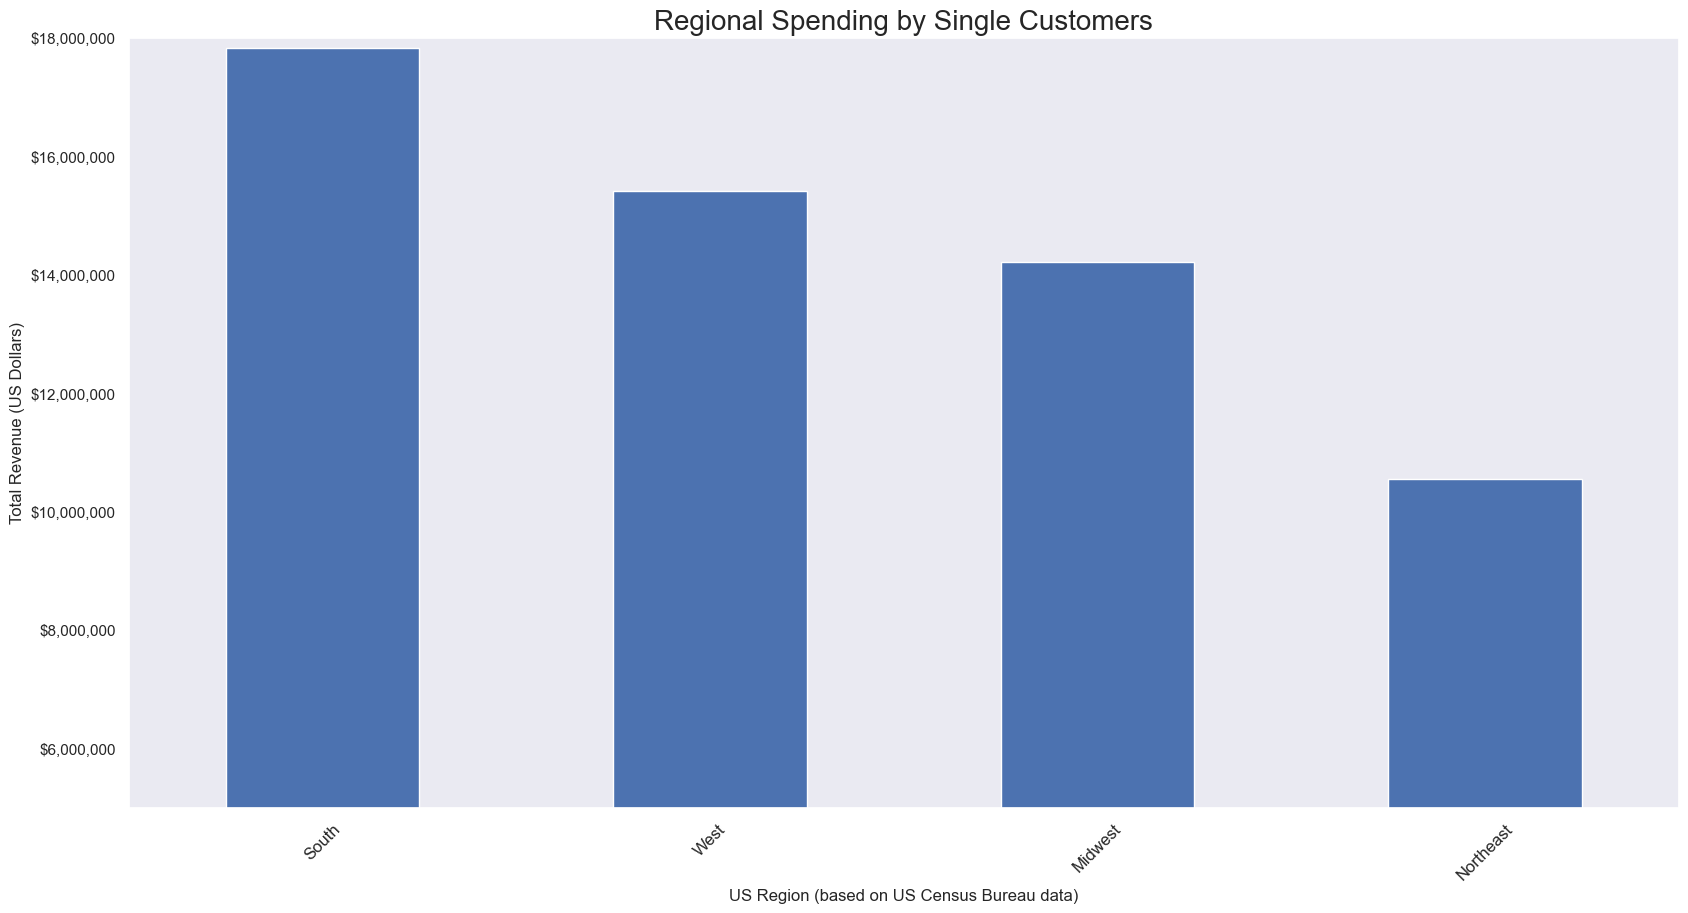

In [51]:
# Creating Bar Chart to show regional spending by single customers
# The following 3 lines format the size, theme, and tick marks for the chart
fig = plt.subplots(figsize = (20, 10))
sns.set_theme(style = "dark")
pl_form = pl_ticker.ScalarFormatter()
# The following statement should create the plot
opan_single_bar = opan_single_all[['region', 'prices']].groupby('region')['prices'].sum().sort_values(ascending = False).plot.bar()
#opan_single_bar = sns.barplot(x = 'region', y = 'prices', data = opan_single_all) #, estimator = sum, ci = None)
# Formatting the x axis title
plt.xticks(rotation = 45, fontsize = '12')
# Getting rid of scientific notation on the y axis
plt.gca().ticklabel_format(axis = 'y', style = 'plain')
# Setting the Y axis
plt.ylim(5000000, 18000000)
# Adds thousands separator as a comma (2 lines)
cur_tix = plt.gca().get_yticks()
plt.gca().set_yticklabels(['${:,.0f}'.format(x) for x in cur_tix])
# The following 3 lines create the titles
opan_single_bar.set_title("Regional Spending by Single Customers", fontsize = 20)
opan_single_bar.set_xlabel("US Region (based on US Census Bureau data)", fontsize = 12)
opan_single_bar.set_ylabel("Total Revenue (US Dollars)", fontsize = 12)

In [52]:
# Saving Bar chart as .png
opan_single_bar.figure.savefig(os.path.join(proj, '04 Analysis', 'Visualizations', 'opan_single_bar.png'))

### 06 Creating presentation versions of earlier graphics attempts

##### Adding a day_of_week_text field to make the visualization more readable

In [23]:
# Adding a text column for days of week
ords_prods_all_new.loc[ords_prods_all_new['orders_day_of_week'] == 0, 'day_of_week_text'] = "Saturday" 

C:\Users\bfd_6\AppData\Local\Temp\ipykernel_25532\1759641329.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Saturday' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  ords_prods_all_new.loc[ords_prods_all_new['orders_day_of_week'] == 0, 'day_of_week_text'] = "Saturday"


In [24]:
ords_prods_all_new.loc[ords_prods_all_new['orders_day_of_week'] == 1, 'day_of_week_text'] = "Sunday" 

In [25]:
ords_prods_all_new.loc[ords_prods_all_new['orders_day_of_week'] == 2, 'day_of_week_text'] = "Monday" 

In [26]:
ords_prods_all_new.loc[ords_prods_all_new['orders_day_of_week'] == 3, 'day_of_week_text'] = "Tuesday" 

In [27]:
ords_prods_all_new.loc[ords_prods_all_new['orders_day_of_week'] == 4, 'day_of_week_text'] = "Wednesday" 

In [28]:
ords_prods_all_new.loc[ords_prods_all_new['orders_day_of_week'] == 5, 'day_of_week_text'] = "Thursday" 

In [29]:
ords_prods_all_new.loc[ords_prods_all_new['orders_day_of_week'] == 6, 'day_of_week_text'] = "Friday" 

In [30]:
ords_prods_all_new['day_of_week_text'].value_counts()

day_of_week_text
Saturday     5908610
Sunday       5411686
Friday       4291304
Thursday     4033729
Monday       4024706
Tuesday      3669535
Wednesday    3624994
Name: count, dtype: int64

##### Recreation of busiest day of the week chart - text for days of the week is easier for the customer to read

C:\Users\bfd_6\AppData\Local\Temp\ipykernel_47120\2823607280.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in cur_tix])


Text(0, 0.5, 'Orders')

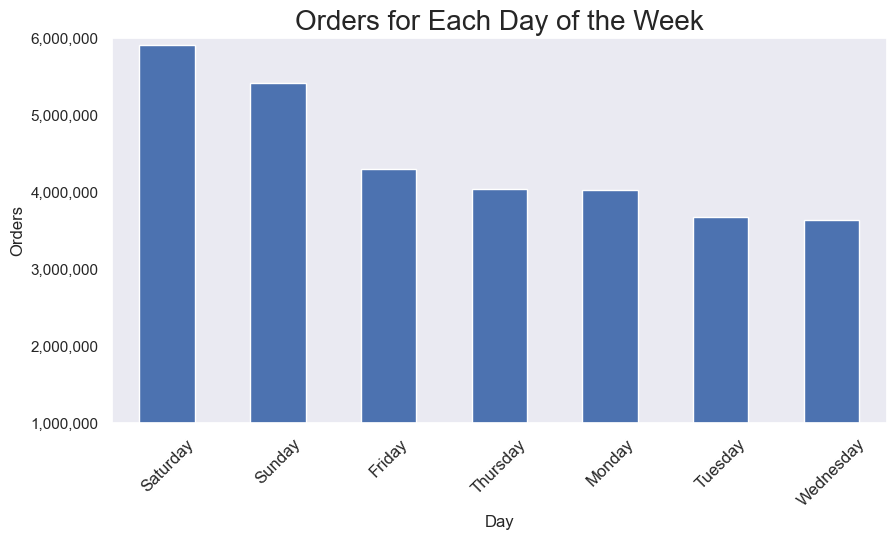

In [62]:
# Re-creating the busiest day of the week chart
# The following 3 lines format the size, theme, and tick marks for the chart
fig = plt.subplots(figsize = (10, 5))
sns.set_theme(style = "dark")
pl_form = pl_ticker.ScalarFormatter()
# The following statement should create the plot
busiest_day_bar = ords_prods_all_new['day_of_week_text'].value_counts().plot.bar()
# Formatting the x axis title
plt.xticks(rotation = 45, fontsize = '12')
# Getting rid of scientific notation on the y axis
plt.gca().ticklabel_format(axis = 'y', style = 'plain')
# Setting the Y axis
plt.ylim(1000000, 6000000)
# Adds thousands separator as a comma (2 lines)
cur_tix = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in cur_tix])
# The following 3 lines create the titles
busiest_day_bar.set_title("Orders for Each Day of the Week", fontsize = 20)
busiest_day_bar.set_xlabel("Day", fontsize = 12)
busiest_day_bar.set_ylabel("Orders", fontsize = 12)

In [50]:
# Saving the bar chart as a .png
busiest_day_bar.figure.savefig(os.path.join(proj, '04 Analysis', 'Visualizations', 'busiest_day_bar.png'), bbox_inches = 'tight')

##### The original of this chart had scientific notation on the y-axis. This is much easier to read.

C:\Users\bfd_6\AppData\Local\Temp\ipykernel_47120\2783728647.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in cur_tix])


Text(0, 0.5, 'Total Orders')

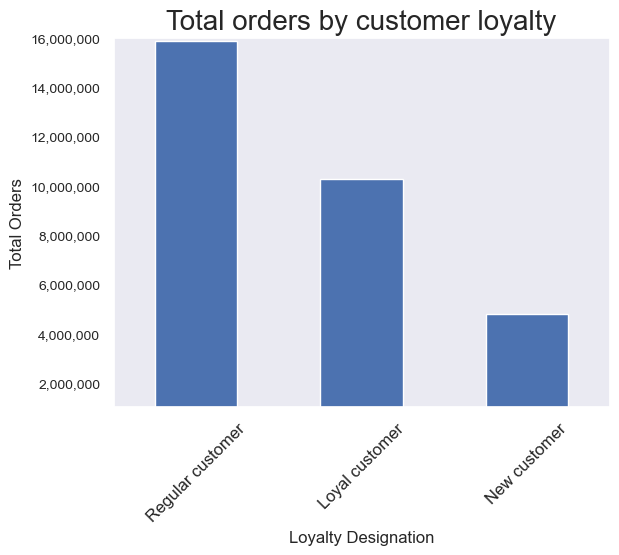

In [22]:
# Re-creating a bar chart based on the loyalty_flag column
# The following 3 lines format the size, theme, and tick marks for the chart
fig = plt.subplots(figsize = (10, 10))
sns.set_theme(style = "dark")
pl_form = pl_ticker.ScalarFormatter()
# The following statement should create the plot
loyalty_bar = ords_prods_all_new['loyalty_flag'].value_counts().plot.bar()
# Formatting the x and y axes titles
plt.xticks(rotation = 45, fontsize = '12')
plt.yticks(fontsize = '10')
plt.ylim(1000000, 16000000)
# Getting rid of scientific notation on the y axis
plt.gca().ticklabel_format(axis = 'y', style = 'plain')
# Adds thousands separator as a comma (2 lines)
cur_tix = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in cur_tix])
# The following 3 lines create the titles
loyalty_bar.set_title("Total orders by customer loyalty", fontsize = 20)
loyalty_bar.set_xlabel("Loyalty Designation", fontsize = 12)
loyalty_bar.set_ylabel("Total Orders", fontsize = 12)

In [24]:
# Saving the bar chart as a .png
loyalty_bar.figure.savefig(os.path.join(proj, '04 Analysis', 'Visualizations', 'loyalty_bar_mono.png'), bbox_inches = 'tight')

##### Spending by hour histogram - The original did not have dollar signs.

C:\Users\bfd_6\AppData\Local\Temp\ipykernel_47120\300079300.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['${:,.0f}'.format(x) for x in cur_tix])


Text(0, 0.5, 'Spending (US Dollars)')

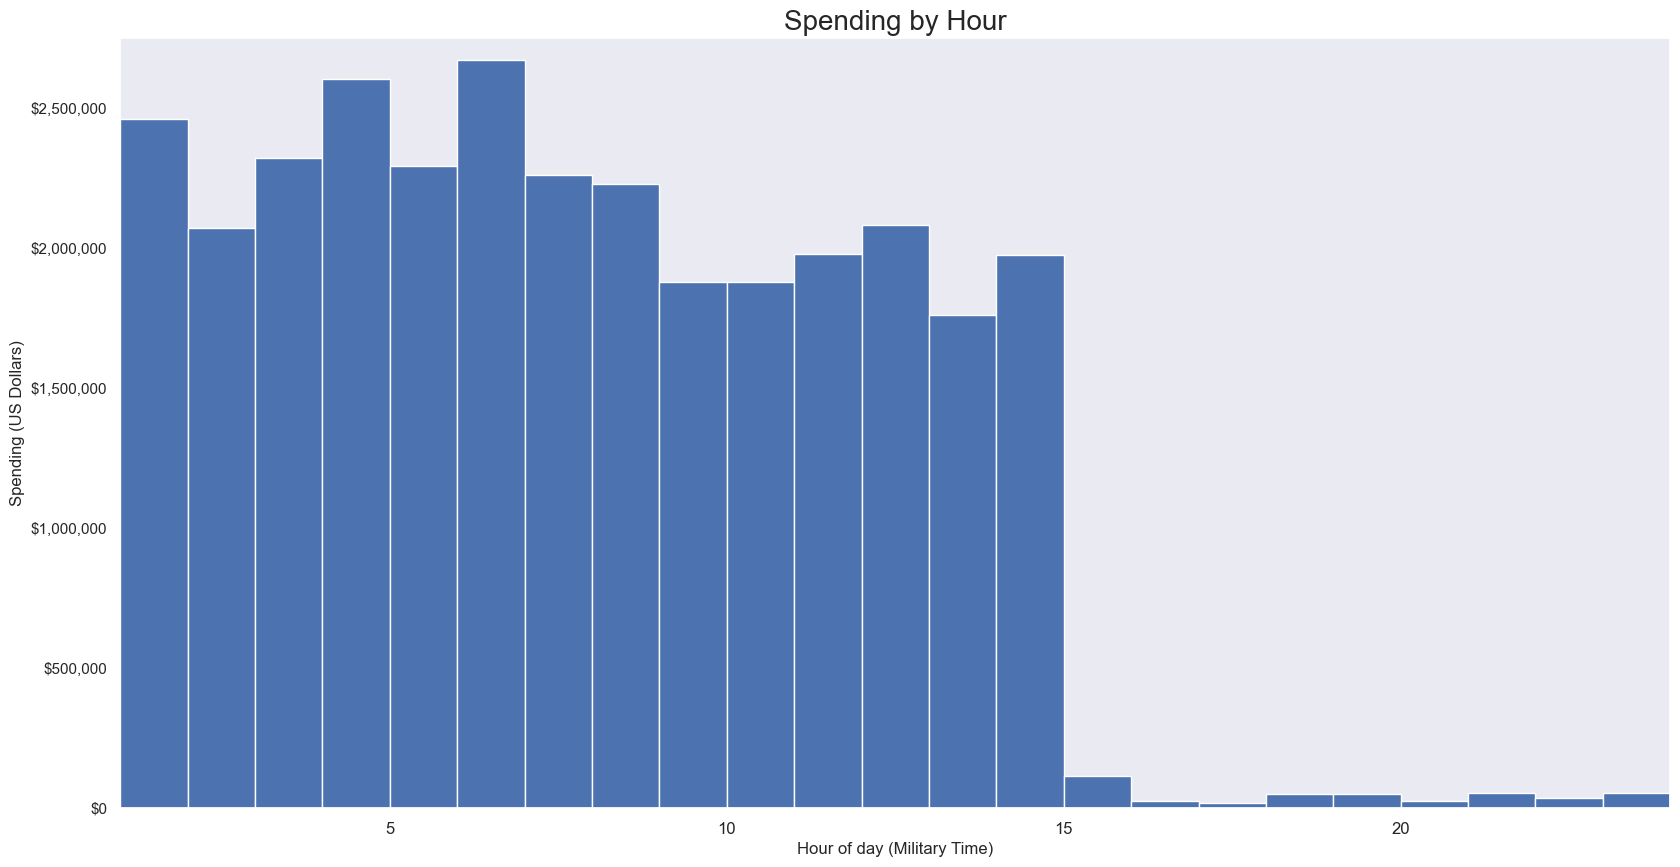

In [41]:
# Re-creating a histogram for spending based on hour of day
# The following 3 lines format the size, theme, and tick marks for the chart
fig = plt.subplots(figsize = (20, 10))
sns.set_theme(style = "dark")
pl_form = pl_ticker.ScalarFormatter()
# The following statement should create the plot
spending_by_hour_hist = ords_prods_all_new['prices'].plot.hist(bins = 24)
# Formatting the x axis title
plt.xticks(fontsize = '12')
# Getting rid of scientific notation on the y axis
plt.gca().ticklabel_format(axis = 'y', style = 'plain')
# Setting the X and Y axes display ranges
plt.xlim(1,24)
plt.ylim(0, 2750000)
# Adds thousands separator as a comma and dollar sign (2 lines)
cur_tix = plt.gca().get_yticks()
plt.gca().set_yticklabels(['${:,.0f}'.format(x) for x in cur_tix])
# The following 3 lines create the titles
spending_by_hour_hist.set_title("Spending by Hour", fontsize = 20)
spending_by_hour_hist.set_xlabel("Hour of day (Military Time)", fontsize = 12)
spending_by_hour_hist.set_ylabel("Spending (US Dollars)", fontsize = 12)

In [88]:
# Saving the histogram
spending_by_hour_hist.figure.savefig(os.path.join(proj, '04 Analysis', 'Visualizations', 'spending_by_hour_hist.png'))

##### Age vs Income - The original plot did not have dollar signs.

C:\Users\bfd_6\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bfd_6\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bfd_6\AppData\Local\Temp\ipykernel_47120\3609910309.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['${:,.0f}'.format(x) for x in cur_xtix])


(15.0, 85.0)

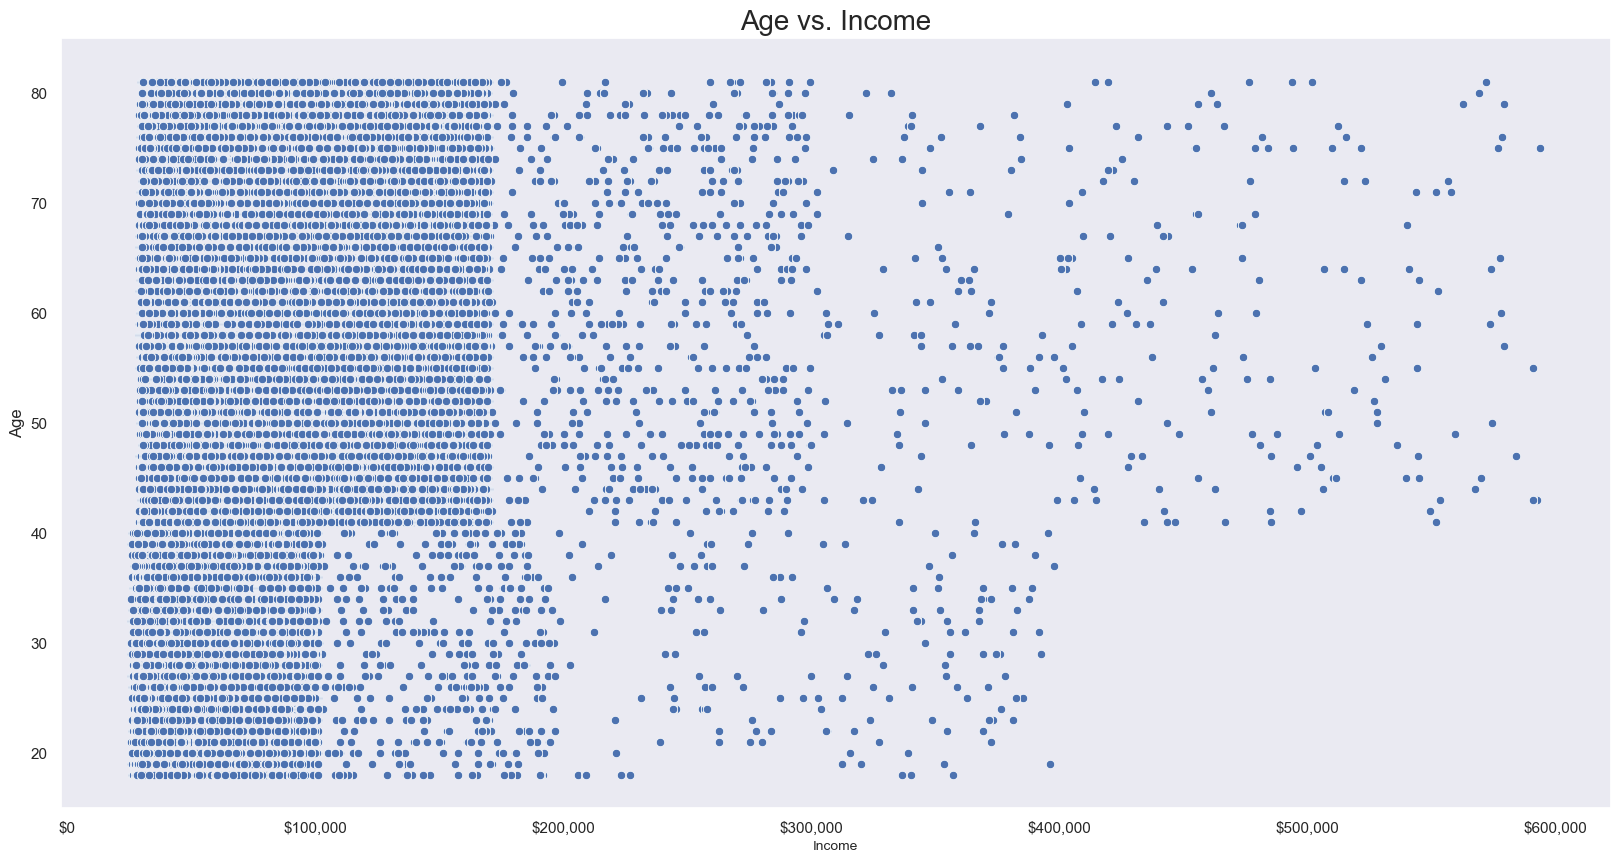

In [46]:
# Re-creating the scatter plot for age vs. income
# The following 2 lines format the size, theme, and tick marks for the chart
fig = plt.subplots(figsize = (20, 10))
sns.set_theme(style = "dark", font_scale = 1)
# The following statement should create the plot
age_income_scatter = sns.scatterplot(x = 'income', y = 'age', data = ords_prods_all_new)
# Adds thousands separator as a comma and dollar sign (2 lines)
cur_xtix = plt.gca().get_xticks()
plt.gca().set_xticklabels(['${:,.0f}'.format(x) for x in cur_xtix])
# The following 3 lines create the titles
age_income_scatter.set_title("Age vs. Income", fontsize = 20)
age_income_scatter.set_xlabel("Income", fontsize = 10)
age_income_scatter.set_ylabel("Age", fontsize = 12)
# Defining the y axis display range
plt.ylim(15, 85)

In [47]:
# Saving scatter plot
age_income_scatter.figure.savefig(os.path.join(proj, '04 Analysis', 'Visualizations', 'age_income_scatter.png'))

#### Regenerating line plots - using sample, then on full dataset. The original did not use revenue and was poorly formatted.

In [53]:
# Creating the sample using seeded (reproducable) random numbers
np.random.seed(62)
kelce = np.random.rand(len(ords_prods_all_new)) <= 0.7

In [54]:
# Storing 30% of the sample in a new df called sample_set
sample_set = ords_prods_all_new[~kelce]

In [55]:
# Verifying that the sample is 30%
len(sample_set) / len(ords_prods_all_new)

0.3002259938166738

In [56]:
# Creating a subset of the sample to allow faster plotting
line_sample = sample_set[['order_hour_of_day', 'prices']]

C:\Users\bfd_6\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bfd_6\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bfd_6\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\bfd_6\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

(0.0, 23.0)

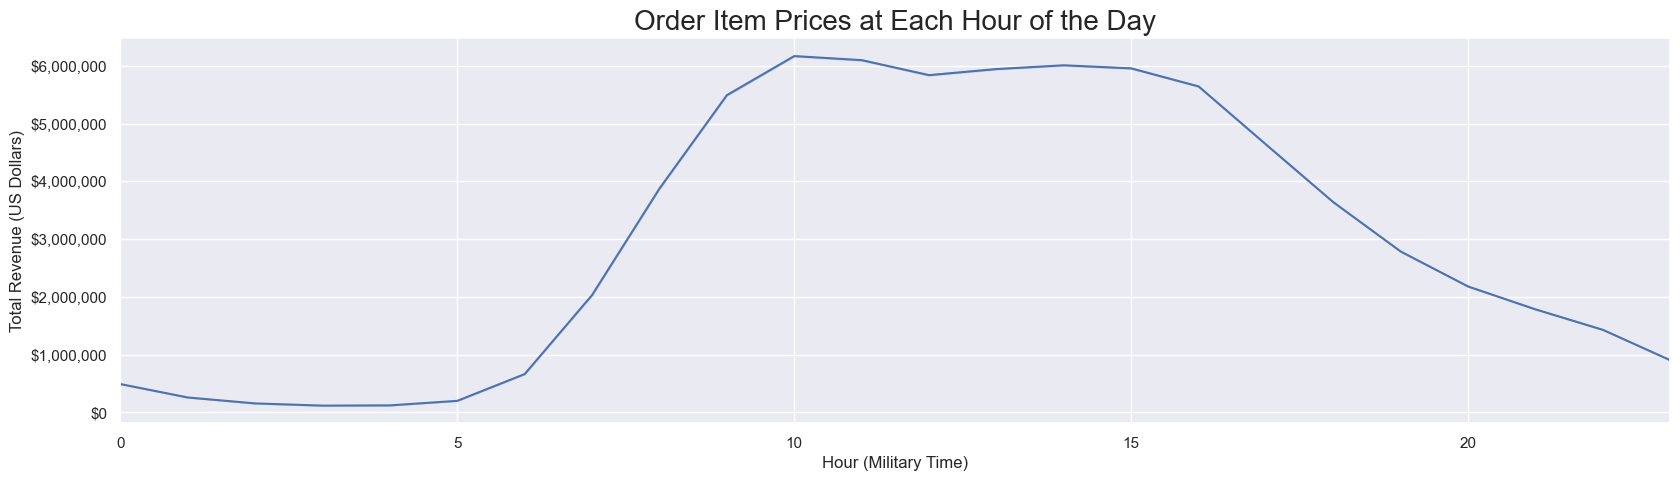

In [61]:
# Creating the line chart of the subset of the sample for prices vs. hour of day.
fig = plt.subplots(figsize = (20, 5))
sns.set_theme(style = "darkgrid") # I wanted grid lines for this visualization.
pl_form = pl_ticker.ScalarFormatter()
price_hod_line = sns.lineplot(data = line_sample, x = 'order_hour_of_day', y = 'prices', estimator = 'sum')
# Getting rid of scientific notation on the y axis
plt.gca().ticklabel_format(axis = 'y', style = 'plain')
# Adds thousands separator as a comma and dollar sign (2 lines)
cur_tix = plt.gca().get_yticks()
plt.gca().set_yticklabels(['${:,.0f}'.format(x) for x in cur_tix])
# Formatting titles
price_hod_line.set_title("Revenues by Hour of Day", fontsize = 20)
price_hod_line.set_xlabel("Hour (Military Time)", fontsize = 12)
price_hod_line.set_ylabel("Total Revenue (US Dollars)", fontsize = 12)
plt.xlim(0, 23)
#plt.ylim(7.6, 8)

In [63]:
# Saving line plot
price_hod_line.figure.savefig(os.path.join(proj, '04 Analysis', 'Visualizations', 'revenue_hour_of_day.png'))

#### Full dataset line plot

In [65]:
line_sample_2 = ords_prods_all_new[['order_hour_of_day', 'prices']]

C:\Users\bfd_6\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bfd_6\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bfd_6\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\bfd_6\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

(0.0, 23.0)

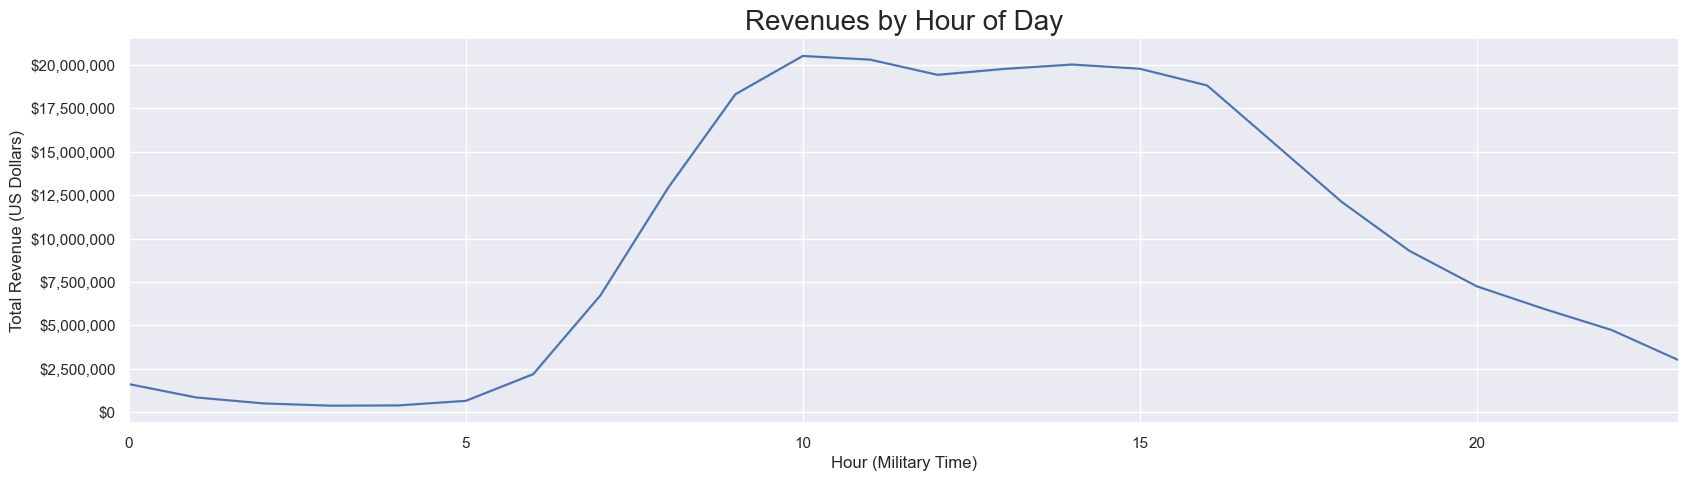

In [66]:
# Creating the line chart of the subset of the sample for prices vs. hour of day.
fig = plt.subplots(figsize = (20, 5))
sns.set_theme(style = "darkgrid")
pl_form = pl_ticker.ScalarFormatter()
# This will generate the plot
revenue_hod_line = sns.lineplot(data = line_sample_2, x = 'order_hour_of_day', y = 'prices', estimator = 'sum')
# Getting rid of scientific notation on the y axis
plt.gca().ticklabel_format(axis = 'y', style = 'plain')
# Adds thousands separator as a comma and dollar sign (2 lines)
cur_tix = plt.gca().get_yticks()
plt.gca().set_yticklabels(['${:,.0f}'.format(x) for x in cur_tix])
# Formatting Titles
revenue_hod_line.set_title("Revenues by Hour of Day", fontsize = 20)
revenue_hod_line.set_xlabel("Hour (Military Time)", fontsize = 12)
revenue_hod_line.set_ylabel("Total Revenue (US Dollars)", fontsize = 12)
plt.xlim(0, 23)

In [67]:
# Saving line plot from larger dataframe
revenue_hod_line.figure.savefig(os.path.join(proj, '04 Analysis', 'Visualizations', 'revenue_hour_of_day_large.png'))

#### I'm using the full dataset line plot in the report. There were no discernable differences between the shape of the sample plot and the full dataset plot. The full dataset plot shows the actual total revenues as opposed to the sample amounts

##### The following chart will show the revenues for each price range based on the requested flag. This was done to use revenues and improve formatting from the original.

C:\Users\bfd_6\AppData\Local\Temp\ipykernel_15048\803034976.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['${:,.0f}'.format(x) for x in cur_tix])


Text(0, 0.5, 'Total Revenue (US Dollars)')

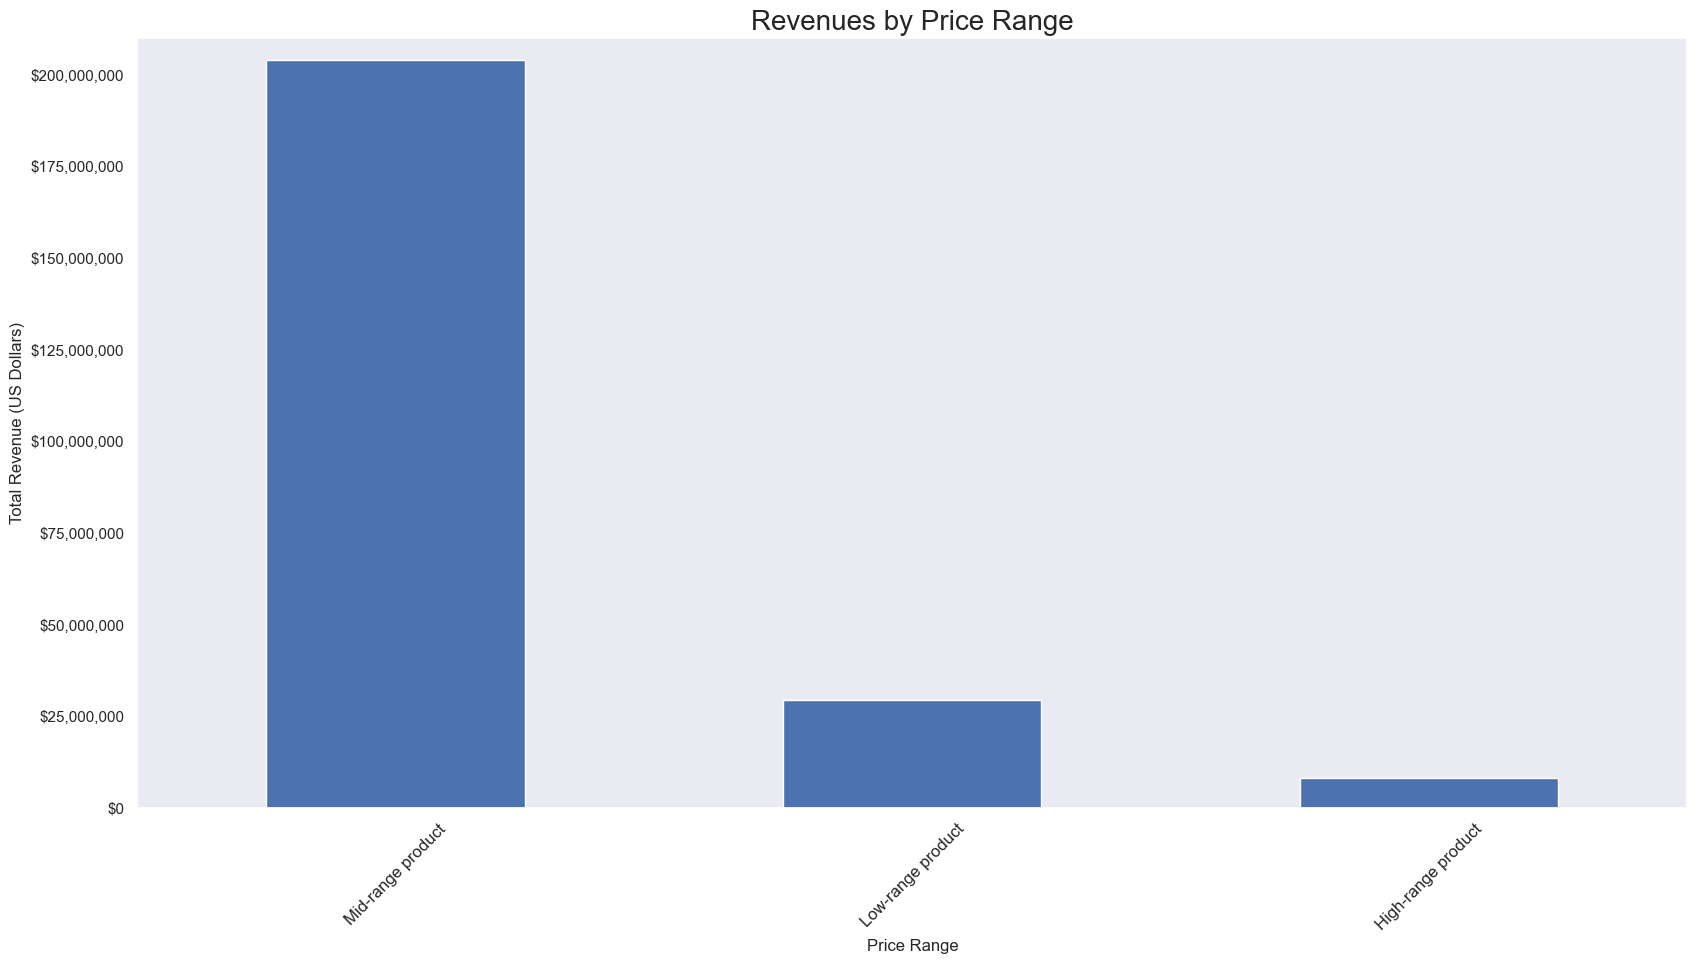

In [30]:
# Creating Bar Chart to show revenues from price range groupings
# The following 3 lines format the size, theme, and tick marks for the chart
fig = plt.subplots(figsize = (20, 10))
sns.set_theme(style = "dark")
pl_form = pl_ticker.ScalarFormatter()
# The following statement should create the plot
price_range_revs_bar = ords_prods_all_new[['price_range_loc', 'prices']].groupby('price_range_loc')['prices'].sum().sort_values(ascending = False).plot.bar()
# Formatting the x axis title
plt.xticks(rotation = 45, fontsize = '12')
# Getting rid of scientific notation on the y axis
plt.gca().ticklabel_format(axis = 'y', style = 'plain')
# Setting the Y axis
plt.ylim(0, 210000000)
# Adds thousands separator as a comma (2 lines)
cur_tix = plt.gca().get_yticks()
plt.gca().set_yticklabels(['${:,.0f}'.format(x) for x in cur_tix])
# The following 3 lines create the titles
price_range_revs_bar.set_title("Revenues by Price Range", fontsize = 20)
price_range_revs_bar.set_xlabel("Price Range", fontsize = 12)
price_range_revs_bar.set_ylabel("Total Revenue (US Dollars)", fontsize = 12)

In [32]:
# Saving bar chart for revenues by price range
price_range_revs_bar.figure.savefig(os.path.join(proj, '04 Analysis', 'Visualizations', 'price_range_revenues_bar.png'), bbox_inches = 'tight')

### 07 Merging information from the department dataset into the main dataset. 

In [28]:
# Creating a dataframe from the department dataset
department_info = pd.read_csv(os.path.join(proj, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))

In [24]:
# Renaming an unnamed column.
department_info.rename(columns = {'Unnamed: 0' : 'department_id'}, inplace = True)

In [32]:
# Saving the updated department_info dataframe to a .csv file
department_info.to_csv(os.path.join(proj, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))

In [8]:
# Removing the old merge flag so I can add a new one
ords_prods_all_new = ords_prods_all_new.drop(columns = ['_merge'])

In [9]:
ords_prods_all_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30964564 entries, 0 to 32404854
Data columns (total 31 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   customer_id             object 
 2   order_number            int64  
 3   orders_day_of_week      int64  
 4   order_hour_of_day       int64  
 5   days_since_prior_order  float64
 6   product_id              int64  
 7   add_to_cart_order       int64  
 8   reordered               int64  
 9   product_name            object 
 10  aisle_id                int64  
 11  department_id           int64  
 12  prices                  float64
 13  price_range_loc         object 
 14  busiest_days            object 
 15  busiest_period_of_day   object 
 16  max_order               int64  
 17  loyalty_flag            object 
 18  cust_avg_price          float64
 19  price_spender           object 
 20  cust_med_days           float64
 21  cust_frequency          object 
 2

In [10]:
# Merging department names into main data frame
ords_prods_all_new_dept = ords_prods_all_new.merge(department_info, on = 'department_id', indicator = True)

In [11]:
# Verifying that the merge worked
ords_prods_all_new_dept.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30964564 entries, 0 to 30964563
Data columns (total 34 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int64   
 1   customer_id             object  
 2   order_number            int64   
 3   orders_day_of_week      int64   
 4   order_hour_of_day       int64   
 5   days_since_prior_order  float64 
 6   product_id              int64   
 7   add_to_cart_order       int64   
 8   reordered               int64   
 9   product_name            object  
 10  aisle_id                int64   
 11  department_id           int64   
 12  prices                  float64 
 13  price_range_loc         object  
 14  busiest_days            object  
 15  busiest_period_of_day   object  
 16  max_order               int64   
 17  loyalty_flag            object  
 18  cust_avg_price          float64 
 19  price_spender           object  
 20  cust_med_days           float64 
 21  cust_f

In [12]:
# Verifying that the merge worked
ords_prods_all_new_dept['department'].value_counts()

department
produce            9079273
dairy eggs         5177182
snacks             2766406
beverages          2571901
frozen             2121731
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699857
meat seafood        674781
breakfast           670850
personal care       424306
babies              410392
international       255991
alcohol             144627
pets                 93060
missing              64768
other                34411
bulk                 33451
Name: count, dtype: int64

In [13]:
# Verifying that the merge worked
ords_prods_all_new_dept['_merge'].value_counts()

_merge
both          30964564
left_only            0
right_only           0
Name: count, dtype: int64

### 08 Generating Visualizations for Department Level Examinations

C:\Users\bfd_6\AppData\Local\Temp\ipykernel_15048\3137120105.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['${:,.0f}'.format(x) for x in cur_tix])


Text(0, 0.5, 'Total Revenue (US Dollars)')

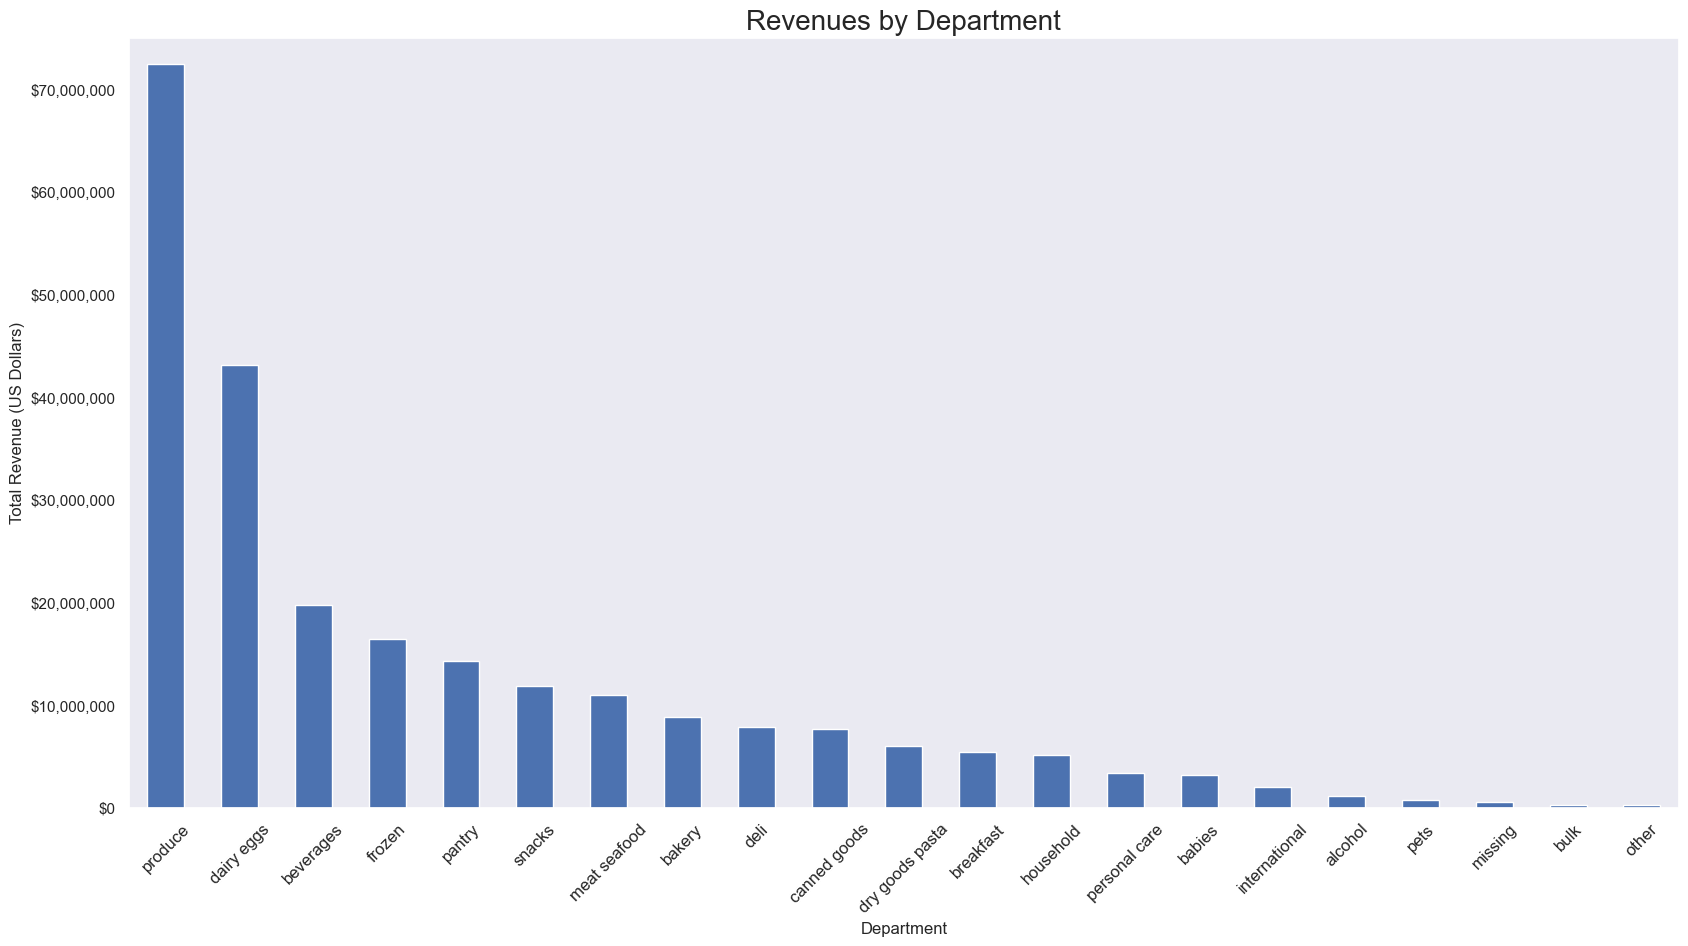

In [50]:
# Creating Bar Chart to show revenues by department
# The following 3 lines format the size, theme, and tick marks for the chart
fig = plt.subplots(figsize = (20, 10))
sns.set_theme(style = "dark")
pl_form = pl_ticker.ScalarFormatter()
# The following statement should create the plot
price_department_revs_bar = ords_prods_all_new_dept[['department', 'prices']].groupby('department')['prices'].sum().sort_values(ascending = False).plot.bar()
# Formatting the x axis title
plt.xticks(rotation = 45, fontsize = '12')
# Getting rid of scientific notation on the y axis
plt.gca().ticklabel_format(axis = 'y', style = 'plain')
# Setting the Y axis
plt.ylim(0, 75000000)
# Adds thousands separator as a comma (2 lines)
cur_tix = plt.gca().get_yticks()
plt.gca().set_yticklabels(['${:,.0f}'.format(x) for x in cur_tix])
# The following 3 lines create the titles
price_department_revs_bar.set_title("Revenues by Department", fontsize = 20)
price_department_revs_bar.set_xlabel("Department", fontsize = 12)
price_department_revs_bar.set_ylabel("Total Revenue (US Dollars)", fontsize = 12)

In [52]:
# Saving bar chart for revenues by price range
price_department_revs_bar.figure.savefig(os.path.join(proj, '04 Analysis', 'Visualizations', 'revenues_by_department.png'), bbox_inches = 'tight')

In [20]:
# Saving the updated dataframe to a .pkl 
ords_prods_all_new.to_pickle(os.path.join(proj, '02 Data', 'Prepared Data', 'orders_products_customers.pkl'))

C:\Users\bfd_6\AppData\Local\Temp\ipykernel_15048\2687542361.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in cur_tix])


Text(0, 0.5, 'Total Orders')

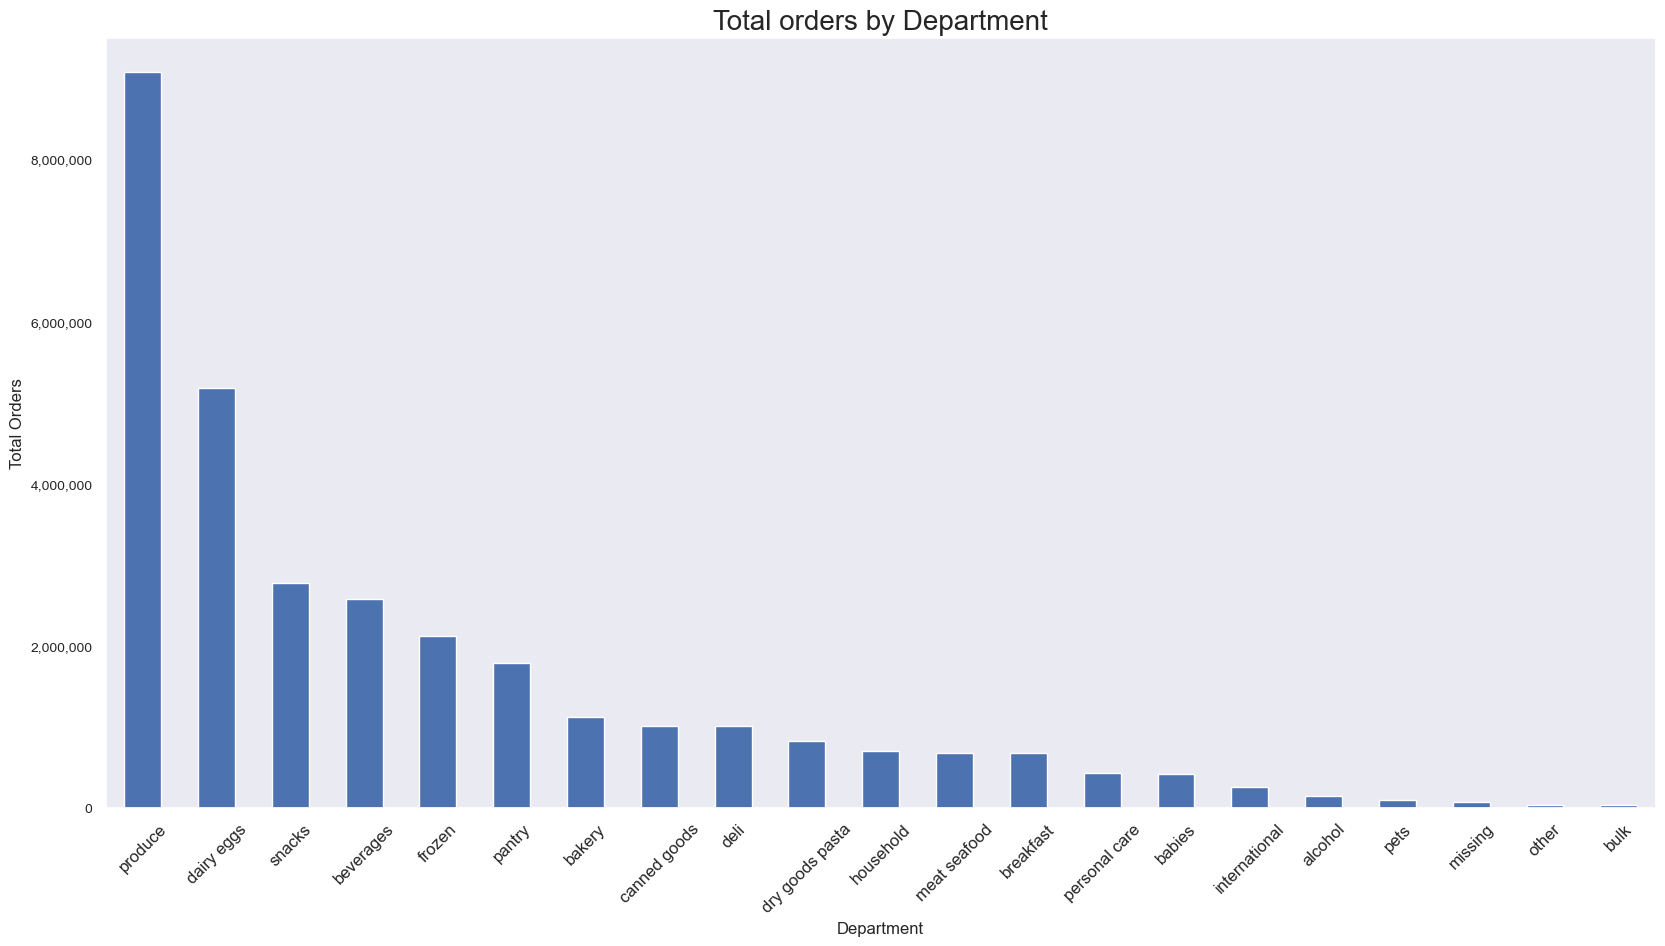

In [55]:
# Generating the bar chart for orders by department
# The following 3 lines format the size, theme, and tick marks for the chart
fig = plt.subplots(figsize = (20, 10))
sns.set_theme(style = "dark")
pl_form = pl_ticker.ScalarFormatter()
# The following statement should create the plot
orders_by_department_bar = ords_prods_all_new_dept['department'].value_counts().plot.bar()
# Formatting the x and y axes titles
plt.xticks(rotation = 45, fontsize = '12')
plt.yticks(fontsize = '10')
plt.ylim(0, 9500000)
# Getting rid of scientific notation on the y axis
plt.gca().ticklabel_format(axis = 'y', style = 'plain')
# Adds thousands separator as a comma (2 lines)
cur_tix = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in cur_tix])
# The following 3 lines create the titles
orders_by_department_bar.set_title("Total orders by Department", fontsize = 20)
orders_by_department_bar.set_xlabel("Department", fontsize = 12)
orders_by_department_bar.set_ylabel("Total Orders", fontsize = 12)

In [56]:
# Saving bar chart for revenues by price range
orders_by_department_bar.figure.savefig(os.path.join(proj, '04 Analysis', 'Visualizations', 'orders_by_department.png'), bbox_inches = 'tight')

### 09 Establishing a data frame from the orders_products_customers.pkl dataset. Starting work on a subsequent day.

In [4]:
# This data frame will contain the new columns created in prior sessions
ords_prods_all_new = pd.read_pickle(os.path.join(proj, '02 Data', 'Prepared Data', 'orders_products_customers.pkl'))

In [5]:
# Verifying the data frame is what I expected.
ords_prods_all_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30964564 entries, 0 to 30964563
Data columns (total 34 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int64   
 1   customer_id             object  
 2   order_number            int64   
 3   orders_day_of_week      int64   
 4   order_hour_of_day       int64   
 5   days_since_prior_order  float64 
 6   product_id              int64   
 7   add_to_cart_order       int64   
 8   reordered               int64   
 9   product_name            object  
 10  aisle_id                int64   
 11  department_id           int64   
 12  prices                  float64 
 13  price_range_loc         object  
 14  busiest_days            object  
 15  busiest_period_of_day   object  
 16  max_order               int64   
 17  loyalty_flag            object  
 18  cust_avg_price          float64 
 19  price_spender           object  
 20  cust_med_days           float64 
 21  cust_f

In [6]:
# Verifying the data frame is what I expected.
ords_prods_all_new['department'].value_counts()

department
produce            9079273
dairy eggs         5177182
snacks             2766406
beverages          2571901
frozen             2121731
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699857
meat seafood        674781
breakfast           670850
personal care       424306
babies              410392
international       255991
alcohol             144627
pets                 93060
missing              64768
other                34411
bulk                 33451
Name: count, dtype: int64

### 10 Demographic Based Visualizations to Answer Questions for the Presentation

##### Revenues by Loyalty Designator

C:\Users\bfd_6\AppData\Local\Temp\ipykernel_23520\1605452709.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['${:,.0f}'.format(x) for x in cur_tix])


Text(0, 0.5, 'Total Revenue (US Dollars)')

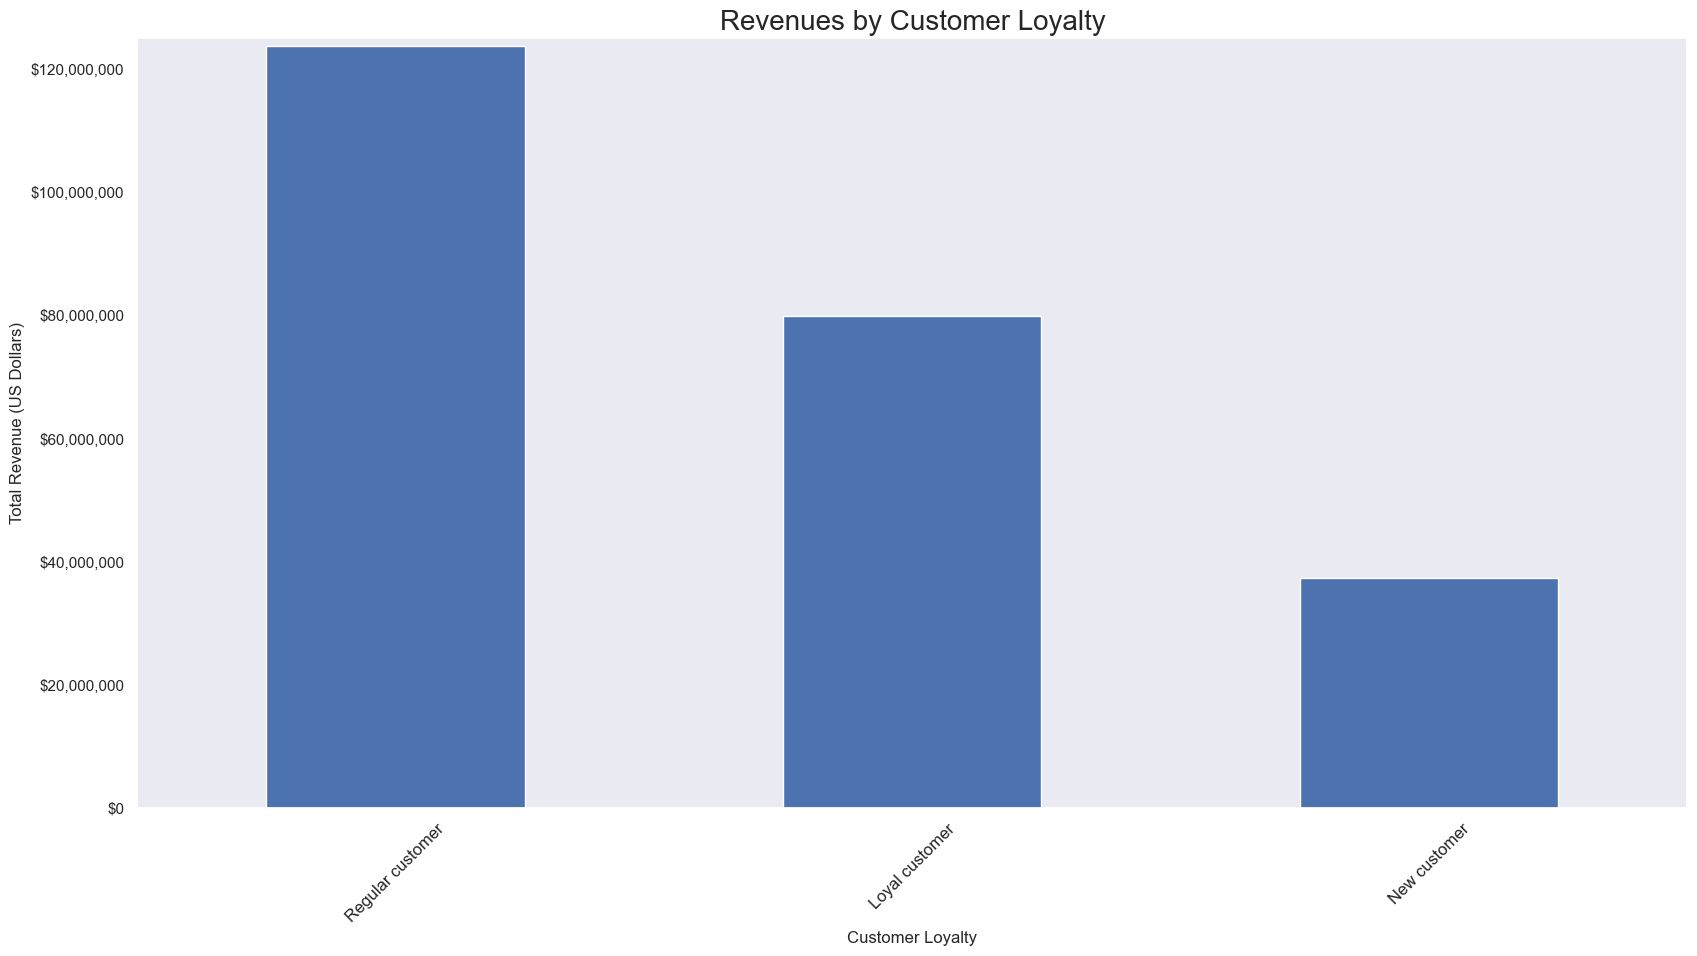

In [34]:
# Creating Bar Chart to show revenues by loyalty designator
# The following 3 lines format the size, theme, and tick marks for the chart
fig = plt.subplots(figsize = (20, 10))
sns.set_theme(style = "dark")
pl_form = pl_ticker.ScalarFormatter()
# The following statement should create the plot
loyalty_revs_bar = ords_prods_all_new[['loyalty_flag', 'prices']].groupby('loyalty_flag')['prices'].sum().sort_values(ascending = False).plot.bar()
# Formatting the x axis title
plt.xticks(rotation = 45, fontsize = '12')
# Getting rid of scientific notation on the y axis
plt.gca().ticklabel_format(axis = 'y', style = 'plain')
# Setting the Y axis
plt.ylim(0, 125000000)
# Adds thousands separator as a comma (2 lines)
cur_tix = plt.gca().get_yticks()
plt.gca().set_yticklabels(['${:,.0f}'.format(x) for x in cur_tix])
# The following 3 lines create the titles
loyalty_revs_bar.set_title("Revenues by Customer Loyalty", fontsize = 20)
loyalty_revs_bar.set_xlabel("Customer Loyalty", fontsize = 12)
loyalty_revs_bar.set_ylabel("Total Revenue (US Dollars)", fontsize = 12)

In [35]:
# Saving bar chart for revenues by loyalty flag
loyalty_revs_bar.figure.savefig(os.path.join(proj, '04 Analysis', 'Visualizations', 'revenues_by_loyalty.png'), bbox_inches = 'tight')

##### Revenues by Region

C:\Users\bfd_6\AppData\Local\Temp\ipykernel_23520\1792689775.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['${:,.0f}'.format(x) for x in cur_tix])


Text(0, 0.5, 'Total Revenue (US Dollars)')

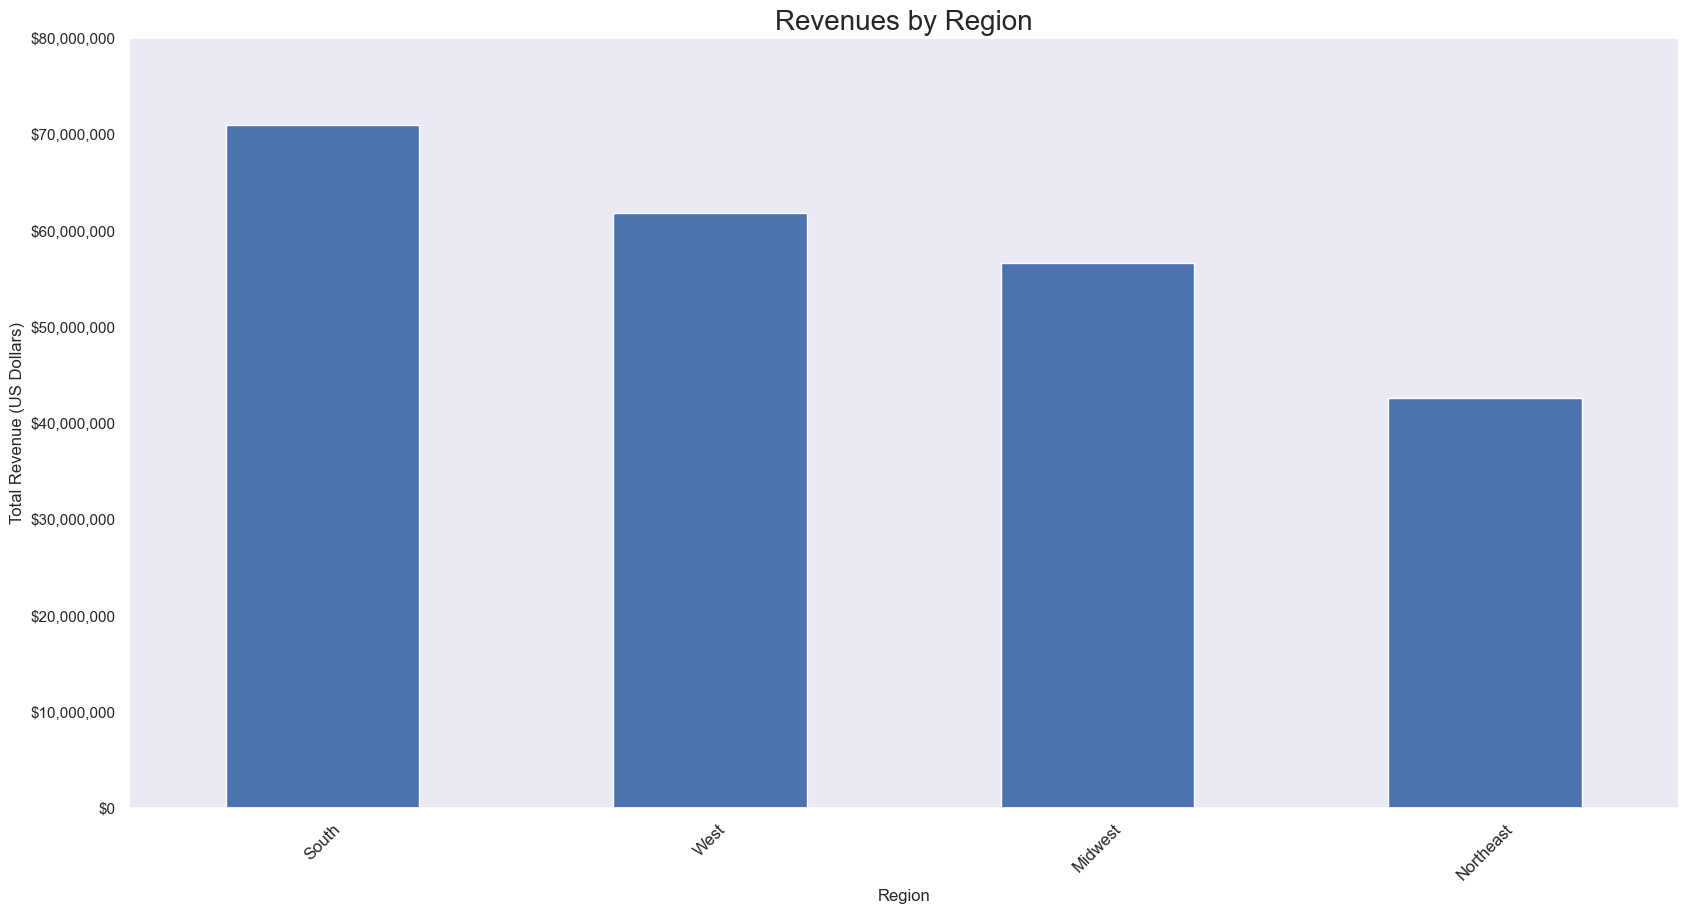

In [38]:
# Creating Bar Chart to show revenues by region
# The following 3 lines format the size, theme, and tick marks for the chart
fig = plt.subplots(figsize = (20, 10))
sns.set_theme(style = "dark")
pl_form = pl_ticker.ScalarFormatter()
# The following statement should create the plot
regional_revs_bar = ords_prods_all_new[['region', 'prices']].groupby('region')['prices'].sum().sort_values(ascending = False).plot.bar()
# Formatting the x axis title
plt.xticks(rotation = 45, fontsize = '12')
# Getting rid of scientific notation on the y axis
plt.gca().ticklabel_format(axis = 'y', style = 'plain')
# Setting the Y axis
plt.ylim(0, 80000000)
# Adds thousands separator as a comma (2 lines)
cur_tix = plt.gca().get_yticks()
plt.gca().set_yticklabels(['${:,.0f}'.format(x) for x in cur_tix])
# The following 3 lines create the titles
regional_revs_bar.set_title("Revenues by Region", fontsize = 20)
regional_revs_bar.set_xlabel("Region", fontsize = 12)
regional_revs_bar.set_ylabel("Total Revenue (US Dollars)", fontsize = 12)

In [39]:
# Saving bar chart for revenues by region
regional_revs_bar.figure.savefig(os.path.join(proj, '04 Analysis', 'Visualizations', 'revenues_by_region.png'), bbox_inches = 'tight')

##### Orders by Region

C:\Users\bfd_6\AppData\Local\Temp\ipykernel_23520\245457955.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in cur_tix])


Text(0, 0.5, 'Total Orders')

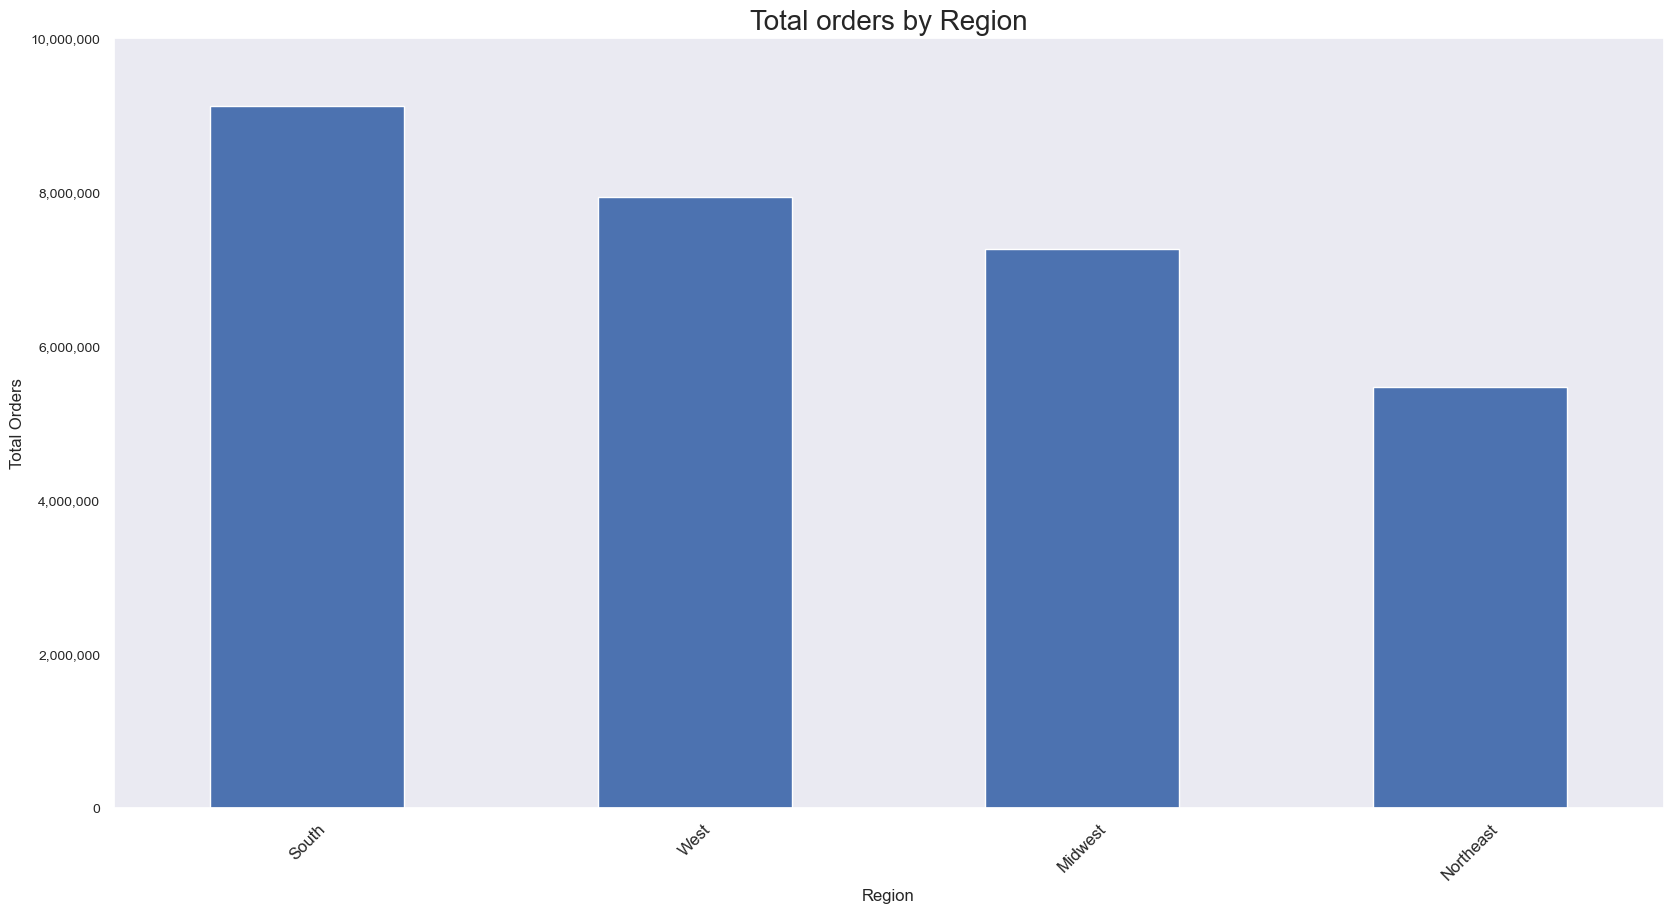

In [42]:
# Generating the bar chart for orders by Region
# The following 3 lines format the size, theme, and tick marks for the chart
fig = plt.subplots(figsize = (20, 10))
sns.set_theme(style = "dark")
pl_form = pl_ticker.ScalarFormatter()
# The following statement should create the plot
orders_by_region_bar = ords_prods_all_new_dept['region'].value_counts().plot.bar()
# Formatting the x and y axes titles
plt.xticks(rotation = 45, fontsize = '12')
plt.yticks(fontsize = '10')
plt.ylim(0, 10000000)
# Getting rid of scientific notation on the y axis
plt.gca().ticklabel_format(axis = 'y', style = 'plain')
# Adds thousands separator as a comma (2 lines)
cur_tix = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in cur_tix])
# The following 3 lines create the titles
orders_by_region_bar.set_title("Total orders by Region", fontsize = 20)
orders_by_region_bar.set_xlabel("Region", fontsize = 12)
orders_by_region_bar.set_ylabel("Total Orders", fontsize = 12)

In [43]:
# Saving bar chart for orders by region
orders_by_region_bar.figure.savefig(os.path.join(proj, '04 Analysis', 'Visualizations', 'orders_by_region.png'), bbox_inches = 'tight')

##### Revenues by Department and Region

C:\Users\bfd_6\AppData\Local\Temp\ipykernel_23520\4269867138.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['${:,.0f}'.format(x) for x in cur_tix])


Text(0, 0.5, 'Total Revenue (US Dollars)')

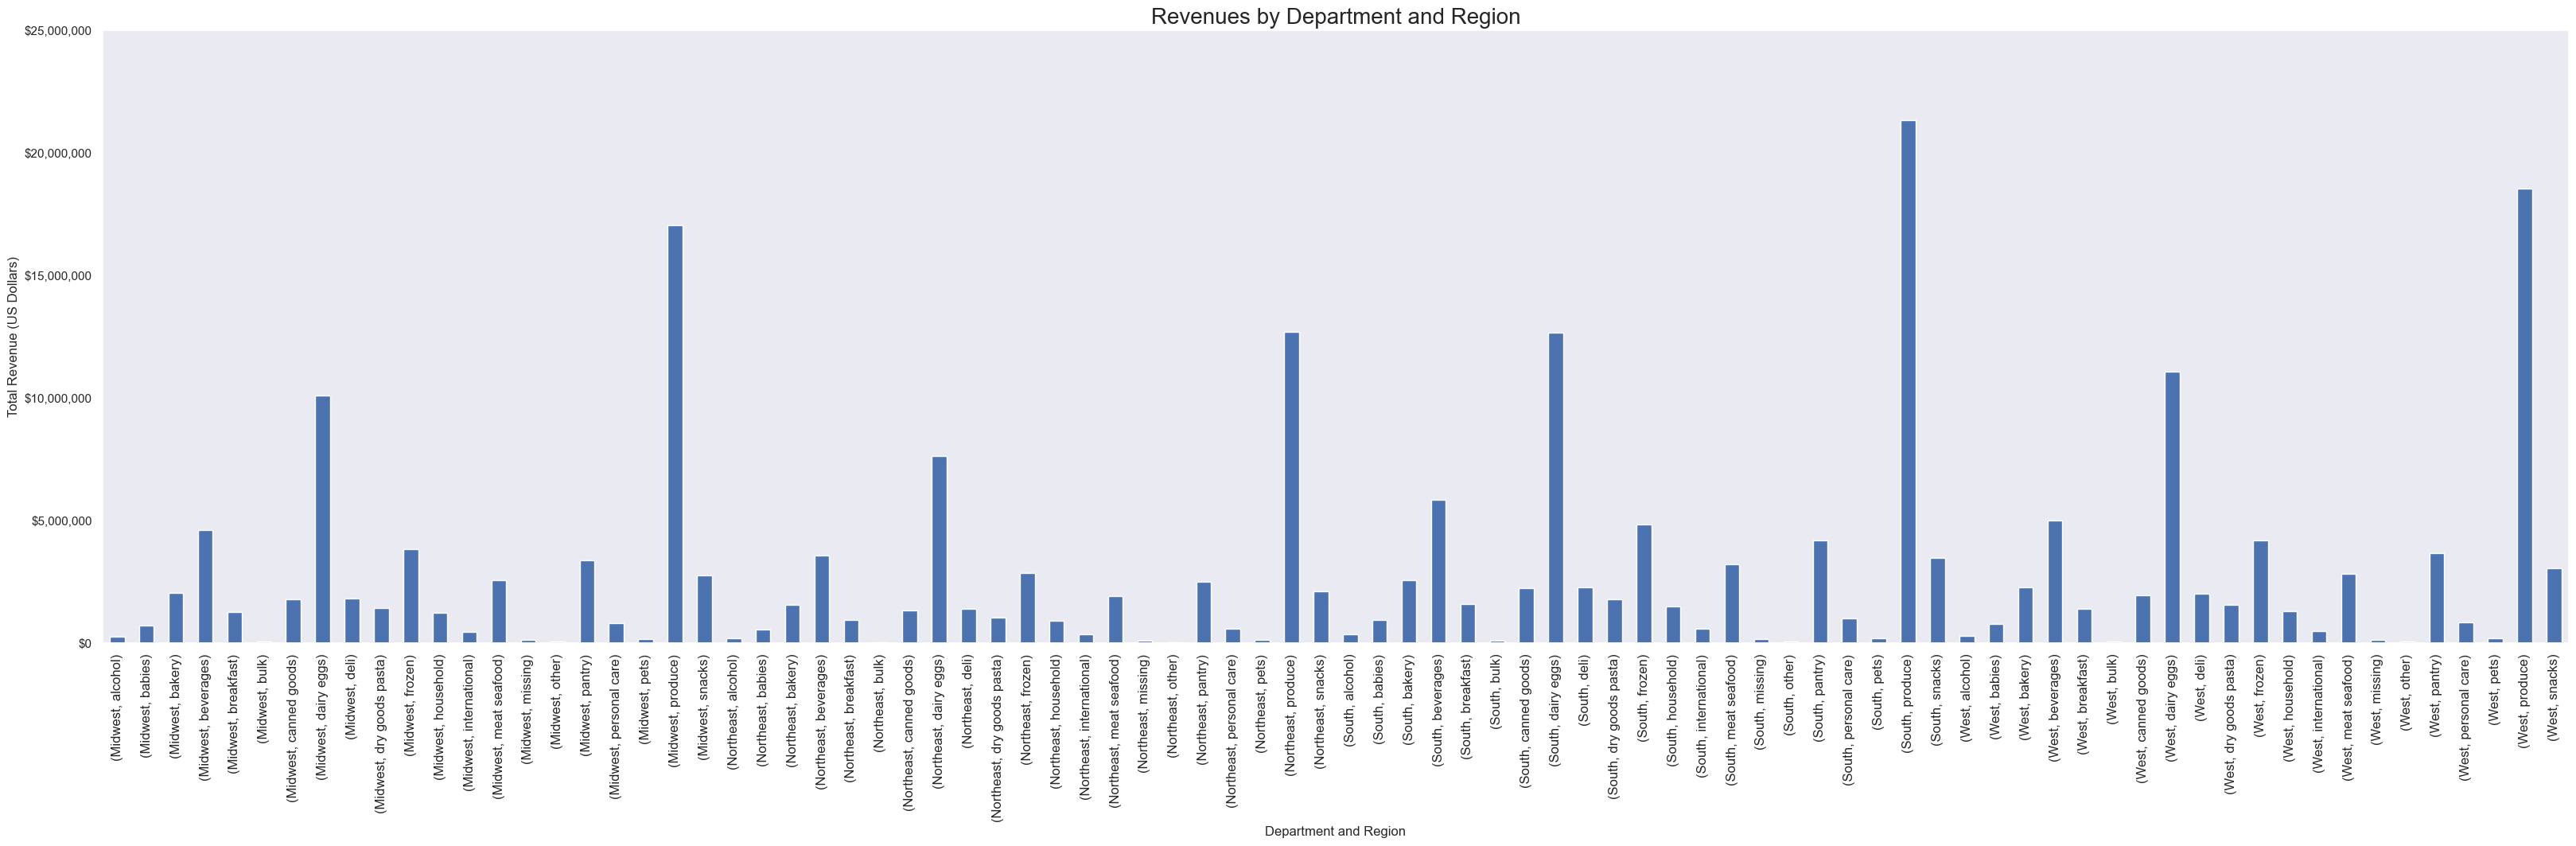

In [64]:
# Creating Bar Chart to show revenues by department and region
# The following 2 lines format the size, theme, and tick marks for the chart
sns.set_theme(style = "dark")
pl_form = pl_ticker.ScalarFormatter()
# Creating a subset grouped appropriately
df_tmp = ords_prods_all_new.groupby(['region', 'department']).agg({'prices': 'sum'})
# The following statement should create the plot
regional_dept_bar = df_tmp.plot.bar(align = 'center', figsize=(40,10), legend = None)
# Formatting the x axis title
plt.xticks(rotation = 90, fontsize = '12') # Had to go to 90 degree rotation to get text to line up due to number of total columns
# Getting rid of scientific notation on the y axis
plt.gca().ticklabel_format(axis = 'y', style = 'plain')
# Setting the Y axis
plt.ylim(0, 25000000)
# Adds thousands separator as a comma (2 lines)
cur_tix = plt.gca().get_yticks()
plt.gca().set_yticklabels(['${:,.0f}'.format(x) for x in cur_tix])
# The following 3 lines create the titles
regional_dept_bar.set_title("Revenues by Department and Region", fontsize = 20)
regional_dept_bar.set_xlabel("Department and Region", fontsize = 12)
regional_dept_bar.set_ylabel("Total Revenue (US Dollars)", fontsize = 12)

In [65]:
# Saving bar chart for orders by region
regional_dept_bar.figure.savefig(os.path.join(proj, '04 Analysis', 'Visualizations', 'revenues_by_dept_region.png'), bbox_inches = 'tight')

##### Revenues by Marital Status and Age

C:\Users\bfd_6\AppData\Local\Temp\ipykernel_28740\1890347336.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['${:,.0f}'.format(x) for x in cur_tix])


Text(0, 0.5, 'Total Revenue (US Dollars)')

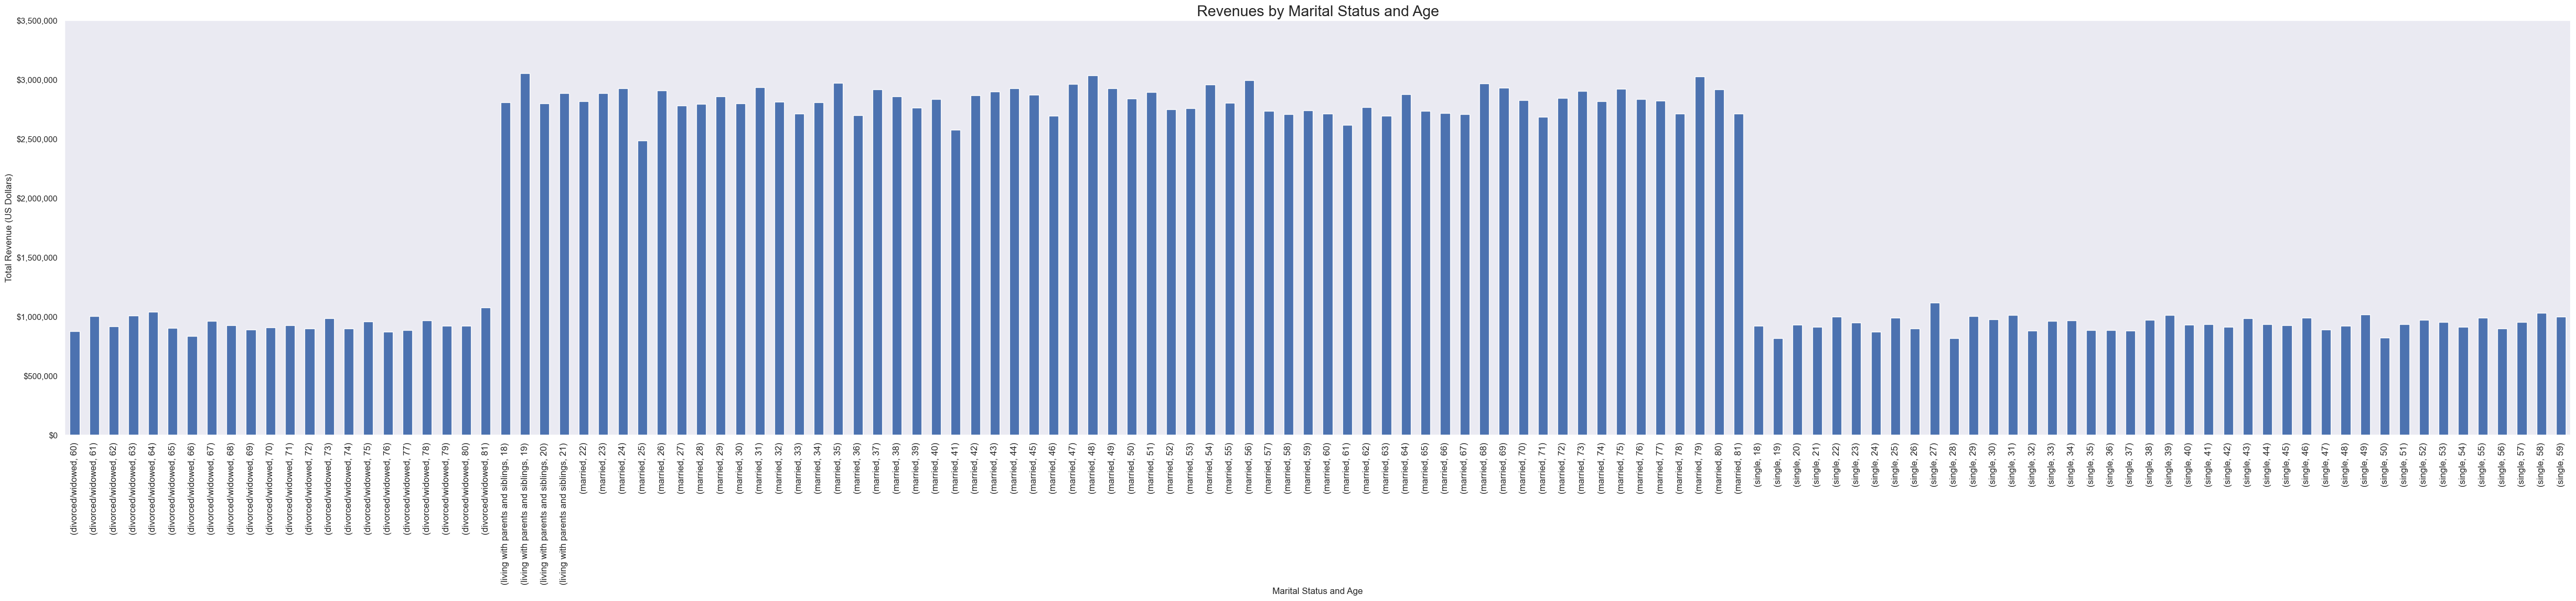

In [11]:
# Creating Bar Chart to show revenues by marital status and age
# The following 2 lines format the size, theme, and tick marks for the chart
sns.set_theme(style = "dark")
pl_form = pl_ticker.ScalarFormatter()
# Creating a subset grouped appropriately
df_tmp_2 = ords_prods_all_new.groupby(['marital_status', 'age']).agg({'prices': 'sum'})
# The following statement should create the plot
mari_age_bar = df_tmp_2.plot.bar(align = 'center', figsize=(60,10), legend = None)
# Formatting the x axis title
plt.xticks(rotation = 90, fontsize = '12') # Had to go to 90 degree rotation to get text to line up due to number of total columns
# Getting rid of scientific notation on the y axis
plt.gca().ticklabel_format(axis = 'y', style = 'plain')
# Setting the Y axis
plt.ylim(0, 3500000)
# Adds thousands separator as a comma (2 lines)
cur_tix = plt.gca().get_yticks()
plt.gca().set_yticklabels(['${:,.0f}'.format(x) for x in cur_tix])
# The following 3 lines create the titles
mari_age_bar.set_title("Revenues by Marital Status and Age", fontsize = 20)
mari_age_bar.set_xlabel("Marital Status and Age", fontsize = 12)
mari_age_bar.set_ylabel("Total Revenue (US Dollars)", fontsize = 12)

In [12]:
# Saving bar chart for revenues by marital status and age
mari_age_bar.figure.savefig(os.path.join(proj, '04 Analysis', 'Visualizations', 'revenues_by_mari_age.png'), bbox_inches = 'tight')

##### Revenues by Marital Status and Age Group

C:\Users\bfd_6\AppData\Local\Temp\ipykernel_28740\3025965711.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['${:,.0f}'.format(x) for x in cur_tix])


Text(0, 0.5, 'Total Revenue (US Dollars)')

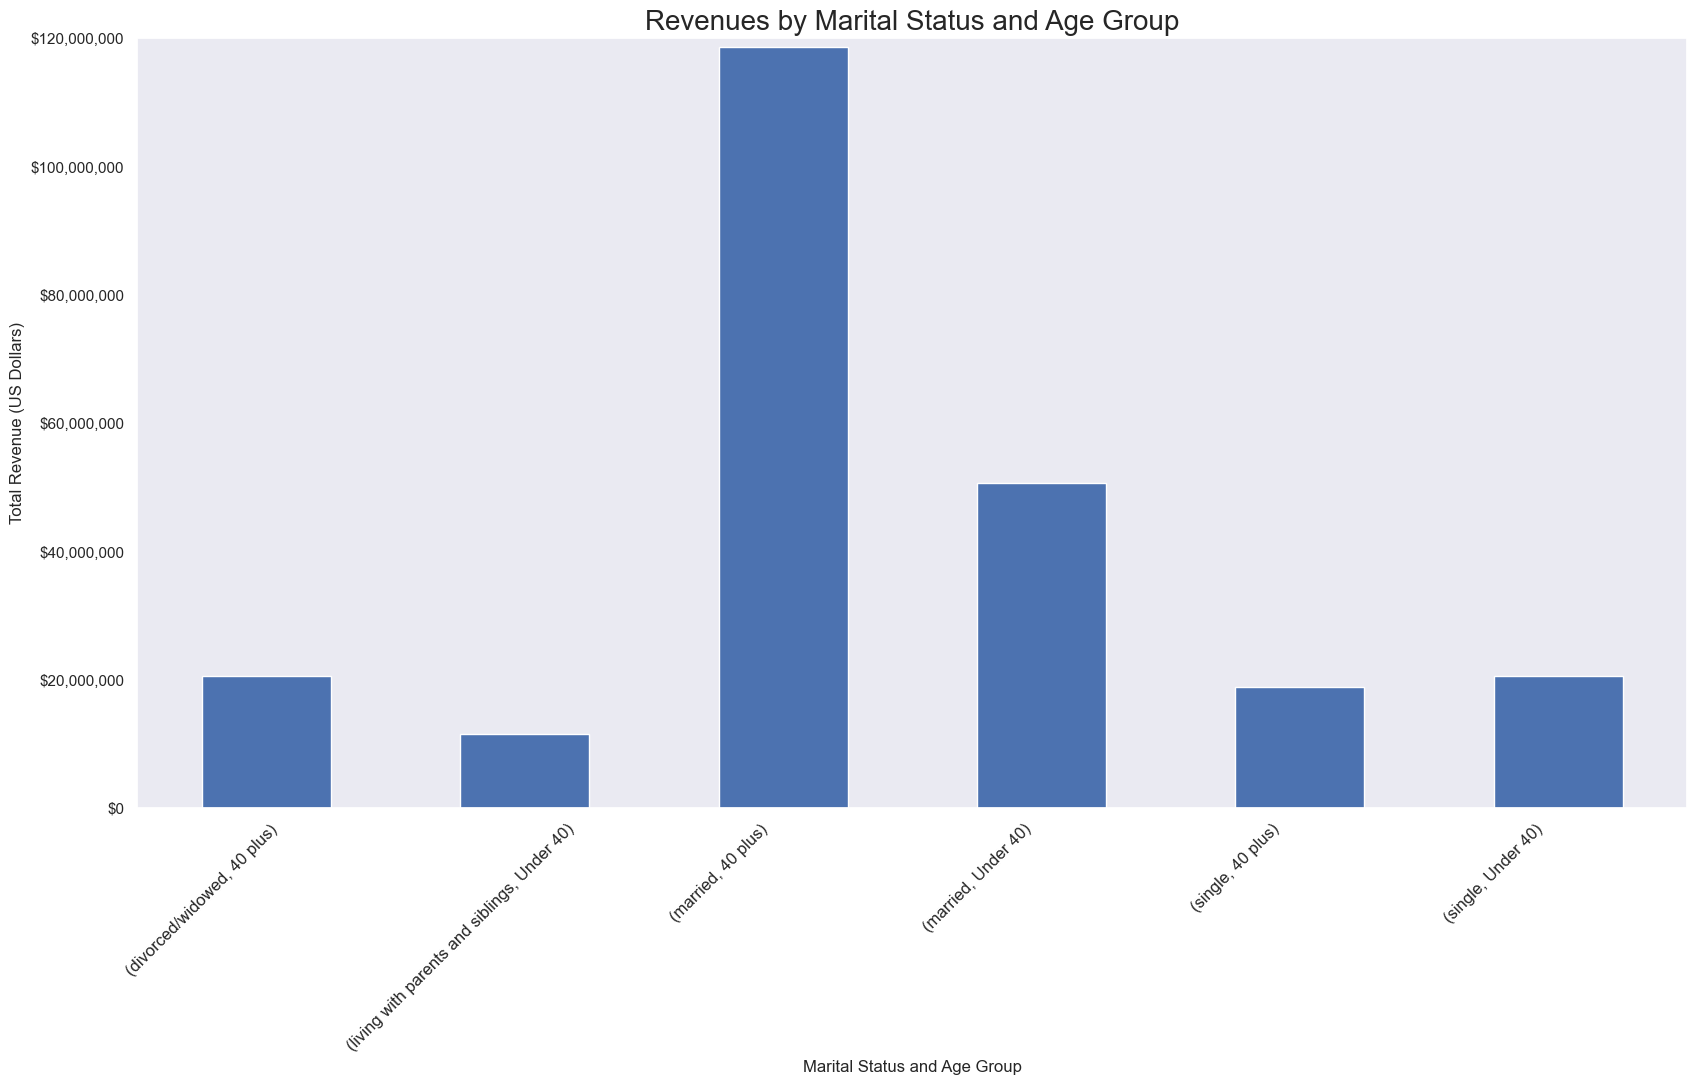

In [36]:
# Creating Bar Chart to show revenues by marital status and age group
# The following 2 lines format the size, theme, and tick marks for the chart
sns.set_theme(style = "dark")
pl_form = pl_ticker.ScalarFormatter()
# Creating a subset grouped appropriately
df_tmp_3 = ords_prods_all_new.groupby(['marital_status', 'age_group']).agg({'prices': 'sum'})
# The following statement should create the plot
mari_age_group_bar = df_tmp_3.plot.bar(align = 'edge', figsize=(20,10), legend = None)
# Formatting the x axis title
plt.xticks(rotation = 45, fontsize = '12') 
# Getting rid of scientific notation on the y axis
plt.gca().ticklabel_format(axis = 'y', style = 'plain')
# Setting the Y axis
plt.ylim(0, 120000000)
# Adds thousands separator as a comma (2 lines)
cur_tix = plt.gca().get_yticks()
plt.gca().set_yticklabels(['${:,.0f}'.format(x) for x in cur_tix])
# The following 3 lines create the titles
mari_age_group_bar.set_title("Revenues by Marital Status and Age Group", fontsize = 20)
mari_age_group_bar.set_xlabel("Marital Status and Age Group", fontsize = 12)
mari_age_group_bar.set_ylabel("Total Revenue (US Dollars)", fontsize = 12)

In [37]:
# Saving bar chart for revenues by marital status and age group
mari_age_group_bar.figure.savefig(os.path.join(proj, '04 Analysis', 'Visualizations', 'revenues_by_mari_agegroup.png'), bbox_inches = 'tight')

##### Revenues by Additional Family and Age Group

C:\Users\bfd_6\AppData\Local\Temp\ipykernel_25532\2570948495.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['${:,.0f}'.format(x) for x in cur_tix])


Text(0, 0.5, 'Total Revenue (US Dollars)')

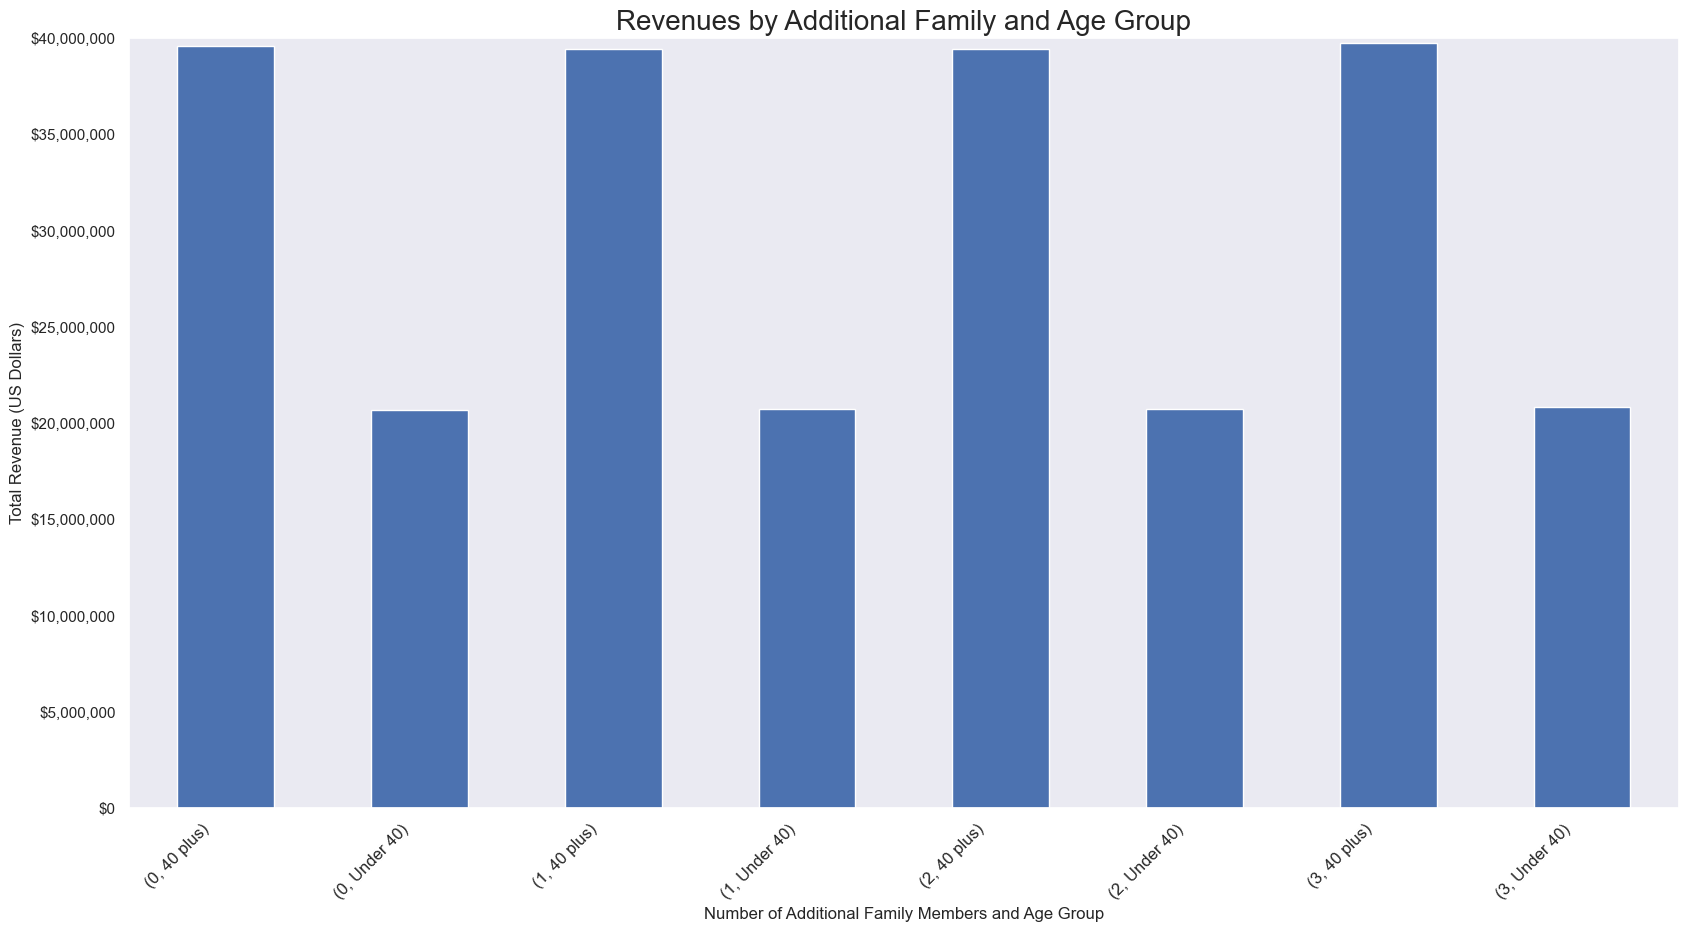

In [11]:
# Creating Bar Chart to show revenues by additional family and age group
# The following 2 lines format the size, theme, and tick marks for the chart
sns.set_theme(style = "dark")
pl_form = pl_ticker.ScalarFormatter()
# Creating a subset grouped appropriately
df_tmp_4 = ords_prods_all_new.groupby(['additional_family', 'age_group']).agg({'prices': 'sum'})
# The following statement should create the plot
fam_age_group_bar = df_tmp_4.plot.bar(align = 'edge', figsize=(20,10), legend = None)
# Formatting the x axis title
plt.xticks(rotation = 45, fontsize = '12') 
# Getting rid of scientific notation on the y axis
plt.gca().ticklabel_format(axis = 'y', style = 'plain')
# Setting the Y axis
plt.ylim(0, 40000000)
# Adds thousands separator as a comma (2 lines)
cur_tix = plt.gca().get_yticks()
plt.gca().set_yticklabels(['${:,.0f}'.format(x) for x in cur_tix])
# The following 3 lines create the titles
fam_age_group_bar.set_title("Revenues by Additional Family and Age Group", fontsize = 20)
fam_age_group_bar.set_xlabel("Number of Additional Family Members and Age Group", fontsize = 12)
fam_age_group_bar.set_ylabel("Total Revenue (US Dollars)", fontsize = 12)

In [12]:
# Saving bar chart for revenues by marital status and age group
fam_age_group_bar.figure.savefig(os.path.join(proj, '04 Analysis', 'Visualizations', 'revenues_by_famsize_agegroup.png'), bbox_inches = 'tight')

##### Orders by Department - Lowest Market Share - Less than 500,000 orders

In [15]:
# Creating list for offering with lowest market share. This will be ad hoc and not retained.
low_market_list = ['personal care', 'babies', 'international', 'alcohol', 'pets', 'missing', 'bulk', 'other']

In [16]:
# Creating subset based on the low market list. This will be ad hoc and not retained.
low_market_subset = ords_prods_all_new.loc[ords_prods_all_new['department'].isin(low_market_list)]

In [17]:
# Verifying the subset
low_market_subset['department'].value_counts()

department
personal care    424306
babies           410392
international    255991
alcohol          144627
pets              93060
missing           64768
other             34411
bulk              33451
Name: count, dtype: int64

In [18]:
# Verifying the subset
low_market_subset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1461006 entries, 27824943 to 30964563
Data columns (total 34 columns):
 #   Column                  Non-Null Count    Dtype   
---  ------                  --------------    -----   
 0   order_id                1461006 non-null  int64   
 1   customer_id             1461006 non-null  object  
 2   order_number            1461006 non-null  int64   
 3   orders_day_of_week      1461006 non-null  int64   
 4   order_hour_of_day       1461006 non-null  int64   
 5   days_since_prior_order  1382946 non-null  float64 
 6   product_id              1461006 non-null  int64   
 7   add_to_cart_order       1461006 non-null  int64   
 8   reordered               1461006 non-null  int64   
 9   product_name            1461006 non-null  object  
 10  aisle_id                1461006 non-null  int64   
 11  department_id           1461006 non-null  int64   
 12  prices                  1461006 non-null  float64 
 13  price_range_loc         1461006 non-nul

C:\Users\bfd_6\AppData\Local\Temp\ipykernel_25532\3973067318.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in cur_tix])


Text(0, 0.5, 'Total Orders')

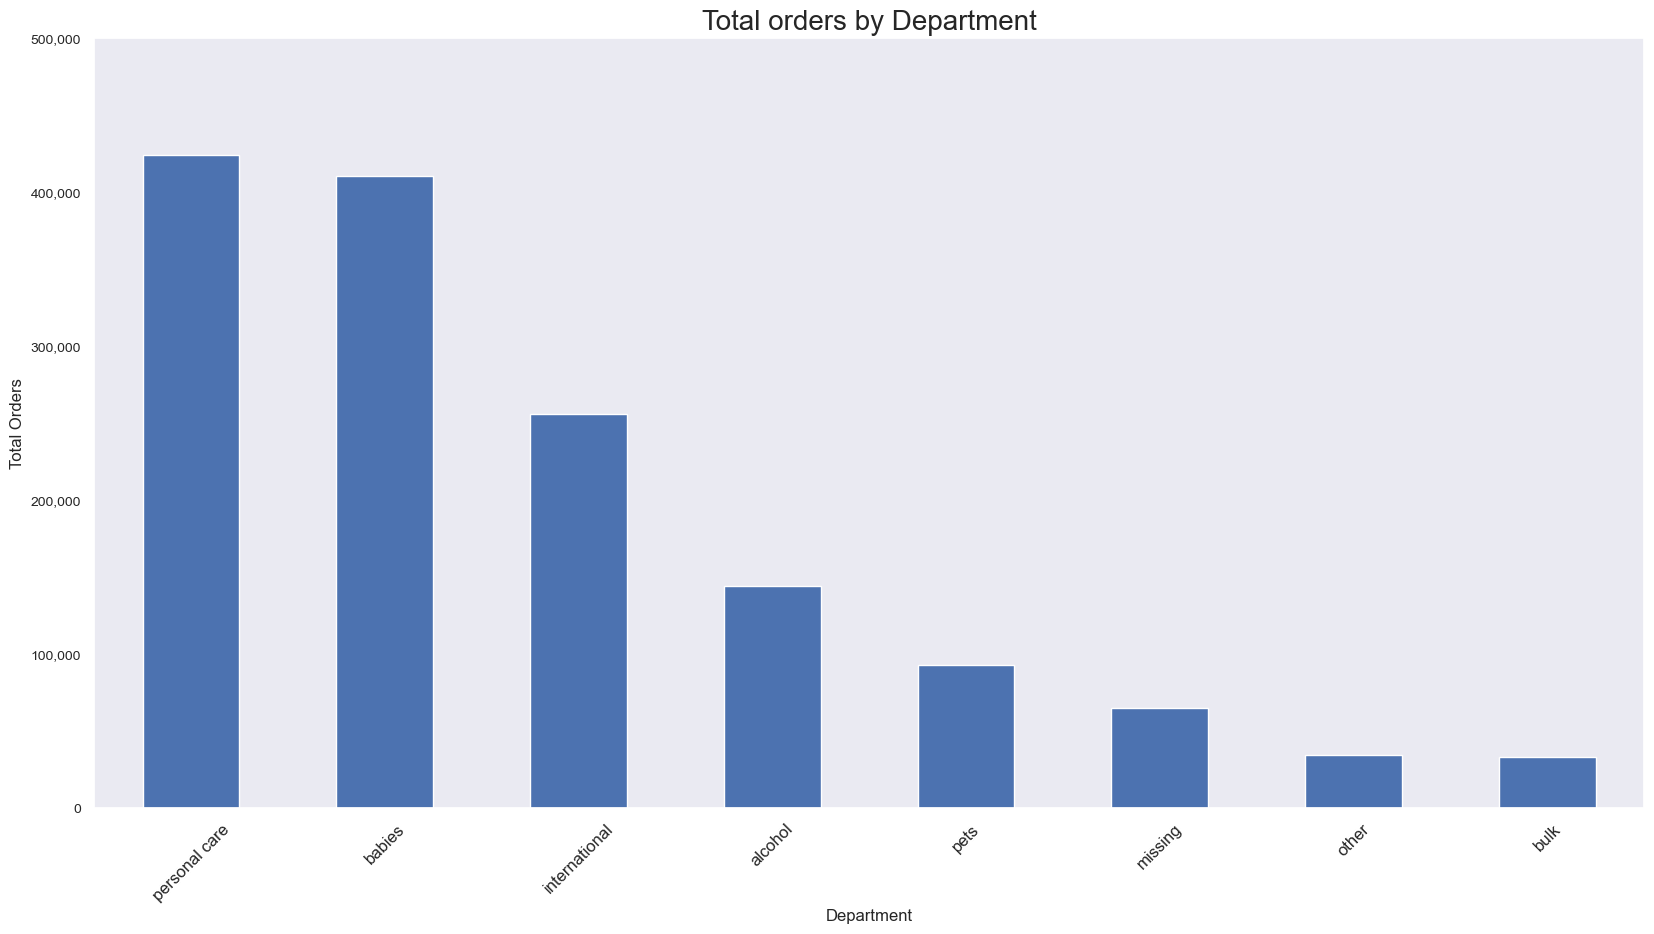

In [21]:
# Generating the bar chart for orders by department for lowest market share
# The following 3 lines format the size, theme, and tick marks for the chart
fig = plt.subplots(figsize = (20, 10))
sns.set_theme(style = "dark")
pl_form = pl_ticker.ScalarFormatter()
# The following statement should create the plot
low_marketshare_bar = low_market_subset['department'].value_counts().plot.bar()
# Formatting the x and y axes titles
plt.xticks(rotation = 45, fontsize = '12')
plt.yticks(fontsize = '10')
plt.ylim(0, 500000)
# Getting rid of scientific notation on the y axis
plt.gca().ticklabel_format(axis = 'y', style = 'plain')
# Adds thousands separator as a comma (2 lines)
cur_tix = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in cur_tix])
# The following 3 lines create the titles
low_marketshare_bar.set_title("Total orders by Department", fontsize = 20)
low_marketshare_bar.set_xlabel("Department", fontsize = 12)
low_marketshare_bar.set_ylabel("Total Orders", fontsize = 12)

In [22]:
# Saving bar chart for orders for lowest market share offerings
low_marketshare_bar.figure.savefig(os.path.join(proj, '04 Analysis', 'Visualizations', 'low_marketshare_departments.png'), bbox_inches = 'tight')

### 11 Saving the file and final verification

In [31]:
# Saving the updated dataframe to a .pkl 
ords_prods_all_new.to_pickle(os.path.join(proj, '02 Data', 'Prepared Data', 'orders_products_customers.pkl'))

In [32]:
# Verifying the dataframe
ords_prods_all_new.shape

(30964564, 35)

In [33]:
# Verifying the dataframe
ords_prods_all_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30964564 entries, 0 to 30964563
Data columns (total 35 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int64   
 1   customer_id             object  
 2   order_number            int64   
 3   orders_day_of_week      int64   
 4   order_hour_of_day       int64   
 5   days_since_prior_order  float64 
 6   product_id              int64   
 7   add_to_cart_order       int64   
 8   reordered               int64   
 9   product_name            object  
 10  aisle_id                int64   
 11  department_id           int64   
 12  prices                  float64 
 13  price_range_loc         object  
 14  busiest_days            object  
 15  busiest_period_of_day   object  
 16  max_order               int64   
 17  loyalty_flag            object  
 18  cust_avg_price          float64 
 19  price_spender           object  
 20  cust_med_days           float64 
 21  cust_f